In [1]:
import pandas as pd

In [3]:
import geopandas as gpd

In [5]:
import os

In [7]:
import matplotlib.pyplot as plt
from osgeo import gdal, osr

In [9]:
import numpy as np

In [11]:
import rasterio

In [ ]:
####### Loading mineralization and deposits data #####

In [13]:
df_min = gpd.read_file("50K/mineralization_gcs_ngdr_20250224141337303/mineralization_gcs_ngdr.shp", crs="EPSG:32643")

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


In [219]:
df_min.to_crs("EPSG:32643", inplace=True)

In [221]:
df_min['commodity'].unique()

array(['GOLD', 'COPPER'], dtype=object)

In [19]:
df_min = df_min[df_min['commodity'].isin(['GOLD', 'COPPER'])]


In [21]:
df_min = df_min[['commodity','geometry']]

In [23]:
df_min['X'] = df_min.geometry.x
df_min['Y'] = df_min.geometry.y

In [25]:
df_min.head()

commodity                        geometry              X             Y
0       GOLD  POINT (684505.749 1520899.899)  684505.748523  1.520900e+06
4     COPPER   POINT (655451.022 1569824.51)  655451.021871  1.569825e+06
8       GOLD  POINT (651343.159 1581023.914)  651343.159329  1.581024e+06
10      GOLD  POINT (657640.484 1583487.249)  657640.483800  1.583487e+06
13      GOLD   POINT (706263.092 1693118.44)  706263.092371  1.693118e+06

In [27]:
df_deposit = gpd.read_file("GeospatialMapsPackage/Deposit.shp")

In [29]:
df_deposit.to_crs("EPSG:32643", inplace=True)

In [31]:
df_deposit['MINERAL_OR'].unique()

array(['Cu', 'Au', 'Au(W)', 'Pb-Zn', 'Di (Diamond)', 'Pb', 'Ba', 'Cu-Pb',
       'Cu-Pb(Ba)', 'Fe(Hematite)', 'Mn', 'Mn-Fe(Hematite)',
       'Cu(Pb,Zn,Sb,Py)', 'Cu (Pb,Zn,Sb ,Py)', 'Au (Cu + Zn)', 'Cr',
       'Fe(Ti-V)', 'Mn (Fe)', 'Fe (Hematite)', 'Cu,Fe(Ti,V)', 'Cu,U',
       'Mn-Fe'], dtype=object)

In [33]:
df_deposit_cu_au = df_deposit[~((df_deposit['MINERAL_OR']== 'Pb-Zn') | (df_deposit['MINERAL_OR']== 'Di (Diamond)')|(df_deposit['MINERAL_OR']== 'Pb')
|(df_deposit['MINERAL_OR']== 'Ba')|(df_deposit['MINERAL_OR']== 'Fe(Hematite)')|(df_deposit['MINERAL_OR']== 'Mn')|(df_deposit['MINERAL_OR']== 'Mn-Fe(Hematite')
                                |(df_deposit['MINERAL_OR']== 'Cr')|(df_deposit['MINERAL_OR']== 'Fe(Ti-V)')|(df_deposit['MINERAL_OR']== 'Mn (Fe)')|(df_deposit['MINERAL_OR']== 'Fe (Hematite)')
                                |(df_deposit['MINERAL_OR']== 'Mn-Fe')|(df_deposit['MINERAL_OR']== 'Mn-Fe(Hematite)'))]


In [223]:
df_deposit_cu_au.columns

Index(['X', 'Y', 'geometry'], dtype='object')

In [225]:
df_deposit_cu_au.to_file("deposit_cu_au.shp")

In [ ]:
########################### Loading the stacked geotiff file ########################

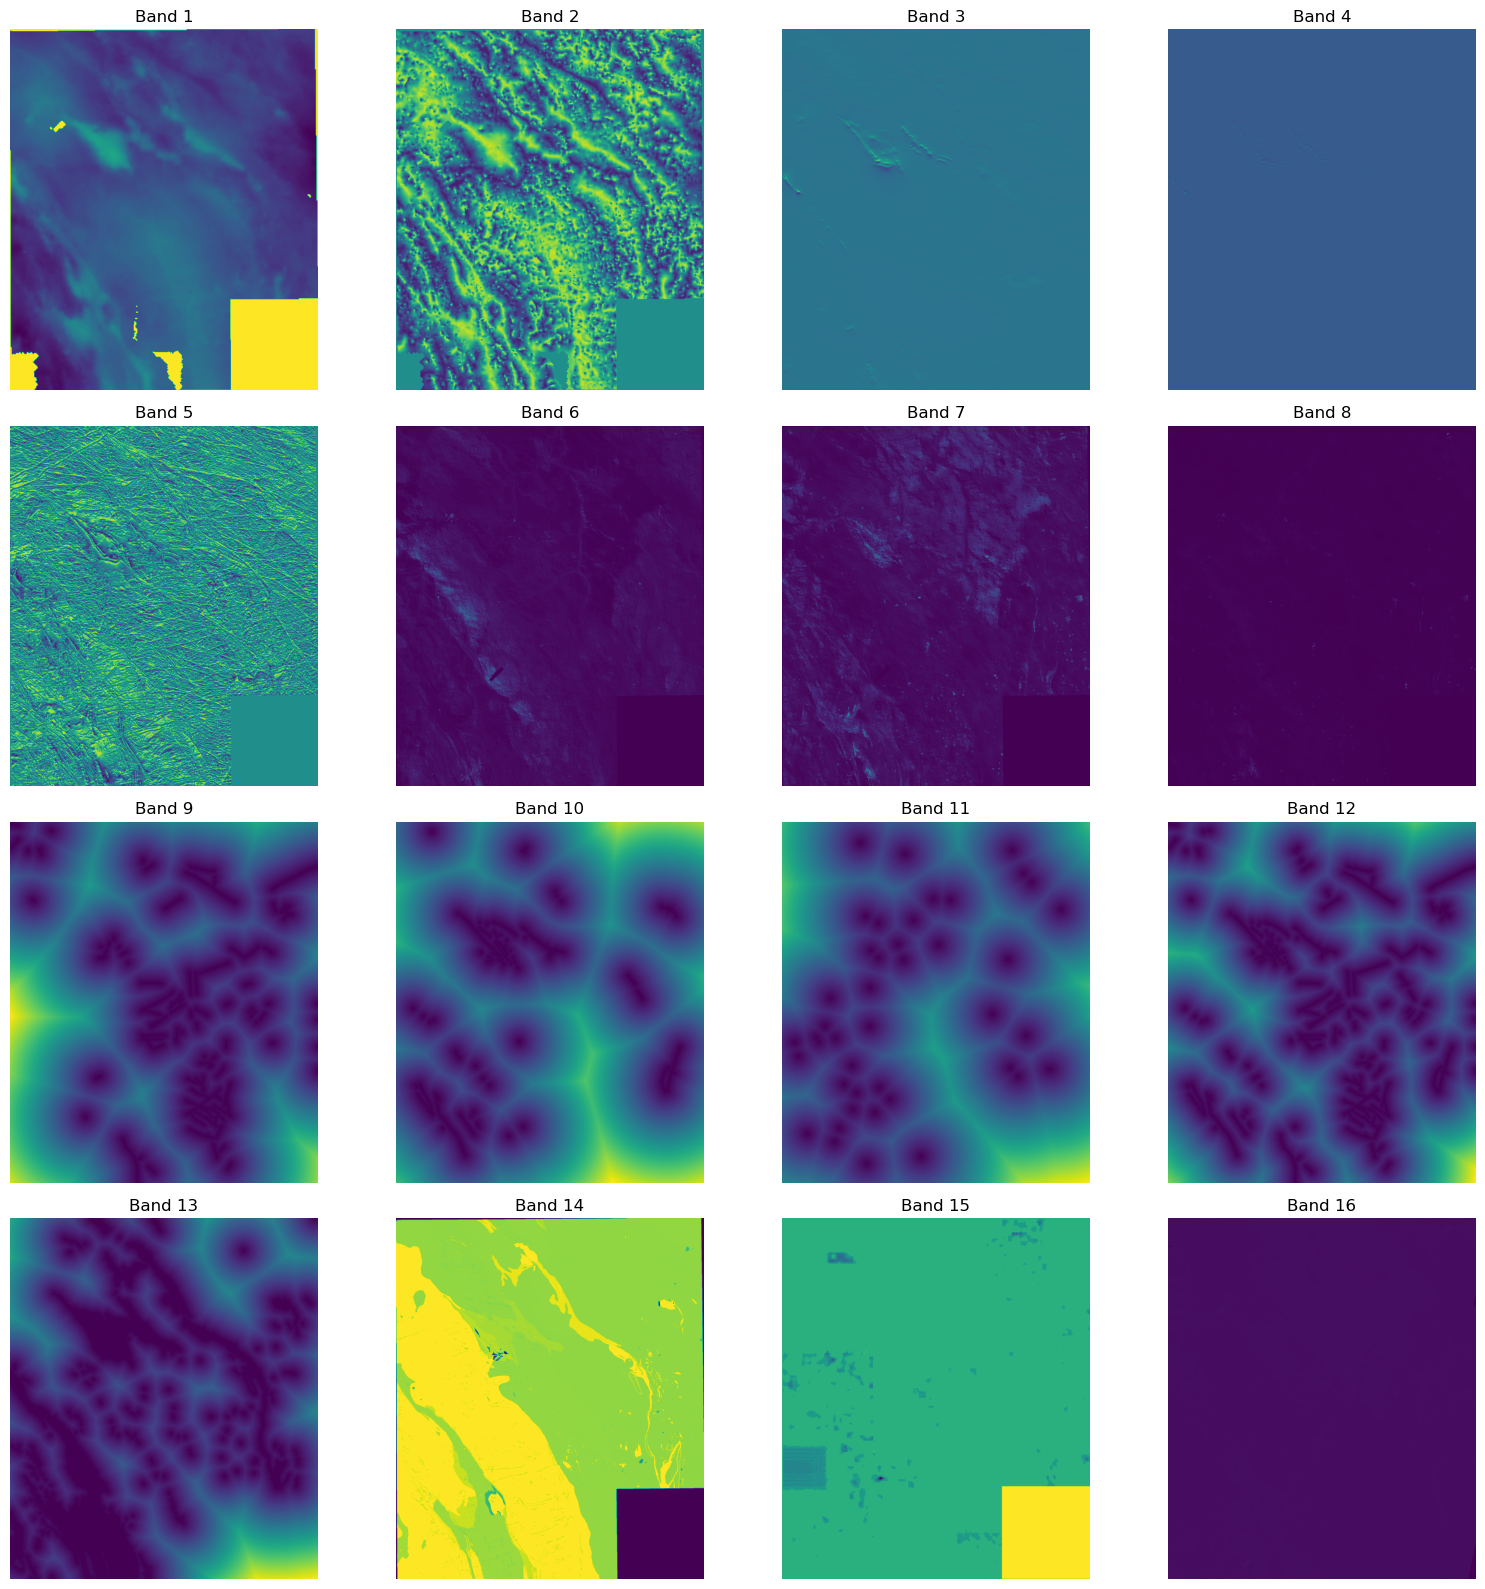

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("GEOTIFF/final_stacked_cuau.tif") as src:
    band_count = src.count
    nodata = src.nodata
    bands = []

    for i in range(1, band_count + 1):
        band = src.read(i).astype('float32')  
        if nodata is None:
            band = np.where(band == nodata, np.nan, band)
        #if src.nodata is not None:
        #    band[band == src.nodata] = np.nan
        bands.append(band)

cols = 4
rows = int(np.ceil(len(bands) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

for i, band in enumerate(bands):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    im = ax.imshow(band, cmap="viridis")
    ax.set_title(f"Band {i + 1}")
    ax.axis("off")

for j in range(len(bands), rows * cols):
    r, c = divmod(j, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis("off")

plt.tight_layout()
plt.show()


In [3]:
import rasterio
from rasterio.windows import from_bounds
import numpy as np

xmin, ymin, xmax, ymax = 742386, 1521300, 796417.39, 1578150

with rasterio.open('GEOTIFF/final_stacked_cuau.tif', 'r+') as src:
    window = from_bounds(xmin, ymin, xmax, ymax, transform=src.transform)
    
    nodata = src.nodata
    if nodata is None:
        nodata = np.nan  # or np.nan
        src.nodata = nodata


    data = src.read(window=window)
    
    data[:] = nodata
    
    src.write(data, window=window)



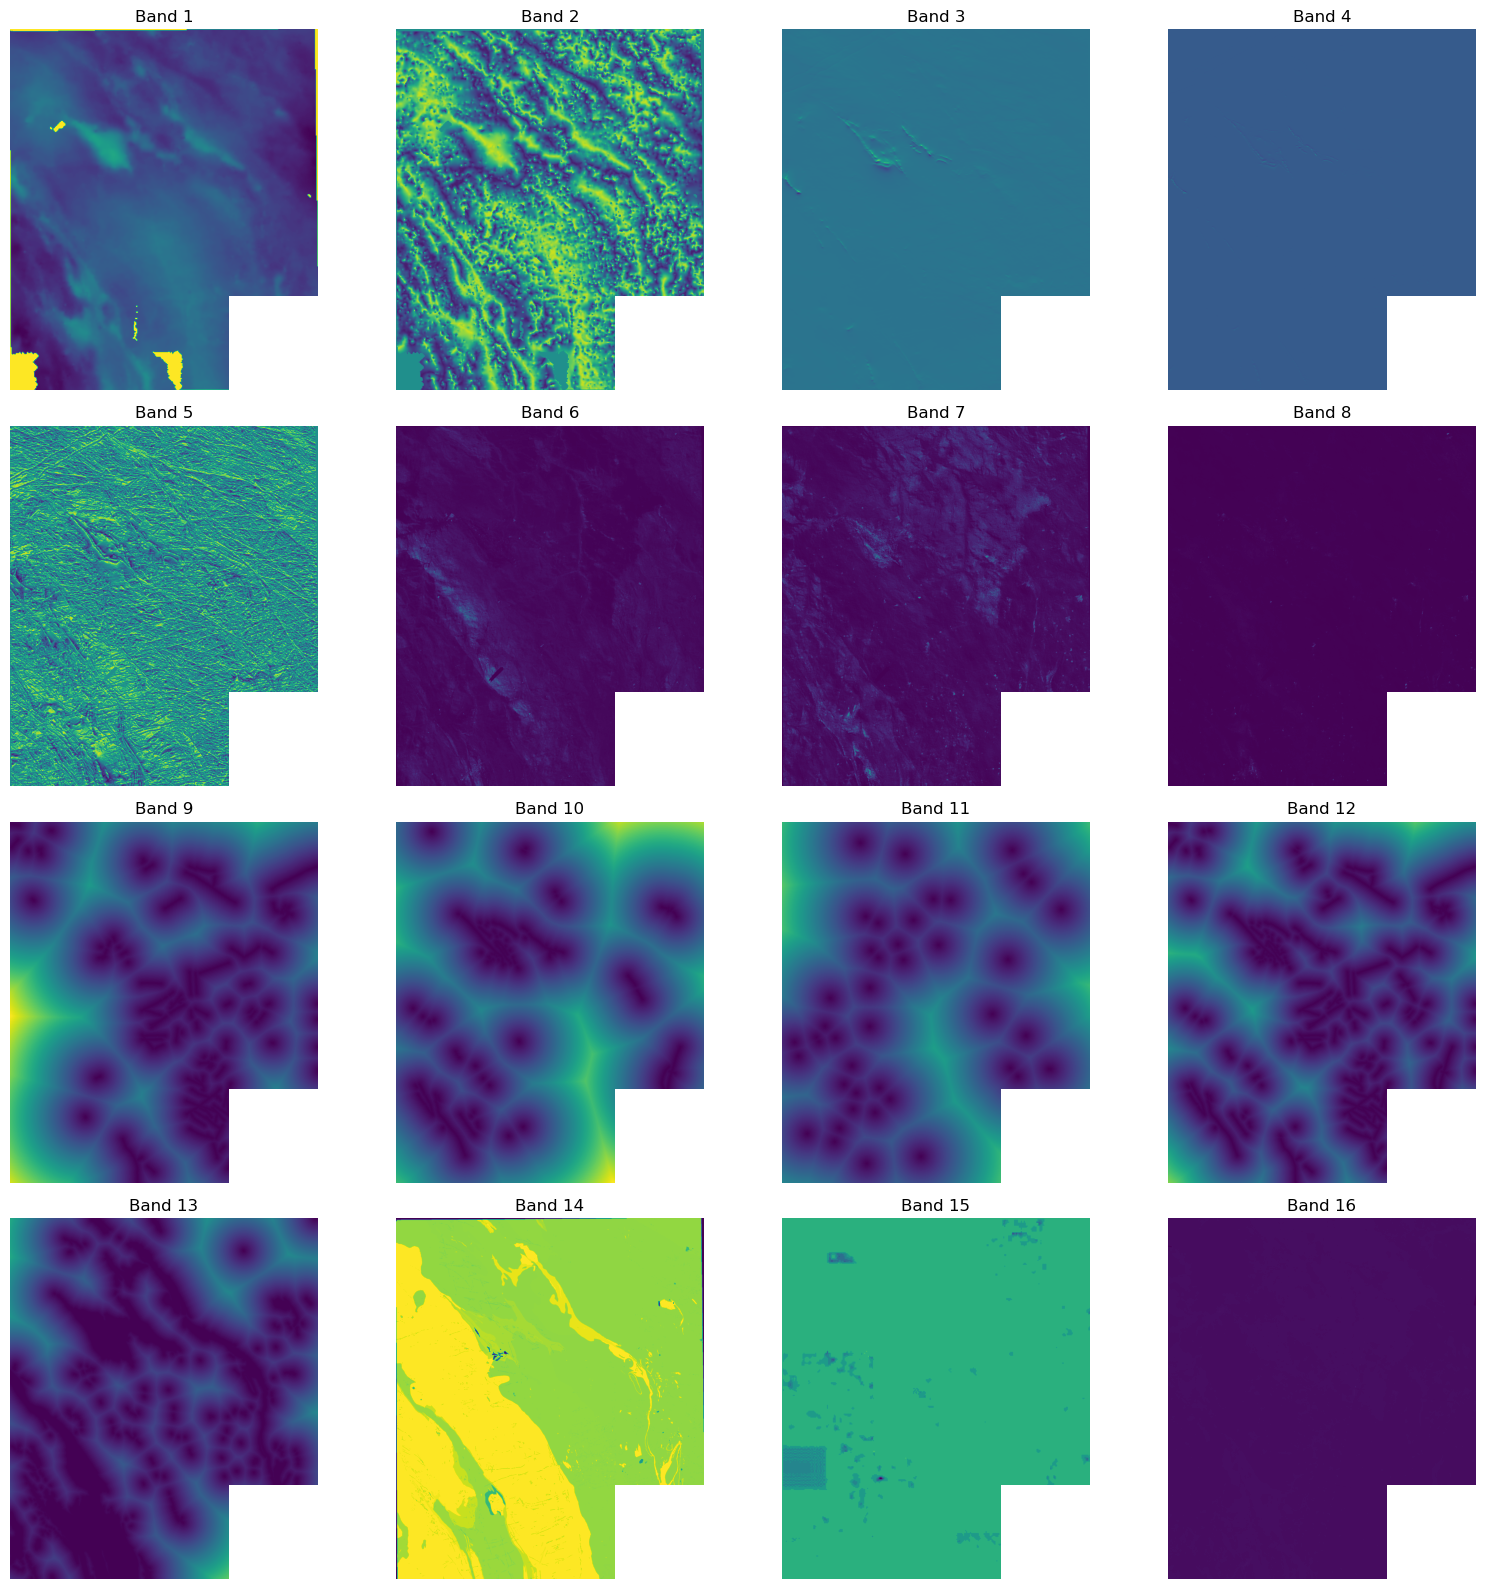

In [61]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("GEOTIFF/final_stacked_cuau.tif") as src:
    band_count = src.count
    nodata = src.nodata
    bands = []

    for i in range(1, band_count + 1):
        band = src.read(i).astype('float32')  
        if nodata is None:
            band = np.where(band == nodata, np.nan, band)
        #if src.nodata is not None:
        #    band[band == src.nodata] = np.nan
        bands.append(band)

cols = 4
rows = int(np.ceil(len(bands) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

for i, band in enumerate(bands):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    im = ax.imshow(band, cmap="viridis")
    ax.set_title(f"Band {i + 1}")
    ax.axis("off")

for j in range(len(bands), rows * cols):
    r, c = divmod(j, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis("off")

plt.tight_layout()
plt.show()


In [7]:
import rasterio
import pandas as pd
from rasterio.transform import xy
import numpy as np

with rasterio.open("GEOTIFF/final_stacked_cuau.tif") as src:
    band_count = src.count
    bands = [src.read(i + 1).flatten() for i in range(band_count)]  
    rows, cols = src.shape  

    
    coords = [xy(src.transform, row, col) for row in range(rows) for col in range(cols)]
    xs, ys = zip(*coords)

data = {
    "Longitude": xs,
    "Latitude": ys,
}

for i, band in enumerate(bands, 1):
    data[f"Band_{i}"] = band

df = pd.DataFrame(data)



In [9]:
df

Longitude   Latitude  Band_1  Band_2  Band_3  Band_4  Band_5  Band_6  \
0         607550.0  1742650.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         607650.0  1742650.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         607750.0  1742650.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         607850.0  1742650.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         607950.0  1742650.0     0.0     0.0     0.0     0.0     0.0     0.0   
...            ...        ...     ...     ...     ...     ...     ...     ...   
4182241   795950.0  1521350.0     0.0     0.0     0.0     0.0     0.0     0.0   
4182242   796050.0  1521350.0     0.0     0.0     0.0     0.0     0.0     0.0   
4182243   796150.0  1521350.0     0.0     0.0     0.0     0.0     0.0     0.0   
4182244   796250.0  1521350.0     0.0     0.0     0.0     0.0     0.0     0.0   
4182245   796350.0  1521350.0     0.0     0.0     0.0     0.0     0.0     0.0   

         Band_7  Band_8        Band_9       Band_10       Band_11  \
0           0.0     0.0   1015.575684  22519.052734  49709.183594   
1           0.0     0.0   1028.419678  22422.328125  49612.472656   
2           0.0     0.0   1046.047485  22325.634766  49515.777344   
3           0.0     0.0   1063.675293  22228.968750  49419.093750   
4           0.0     0.0   1081.303101  22132.333984  49322.421875   
...         ...     ...           ...           ...           ...   
4182241     0.0     0.0  54137.023438  60489.207031  73742.562500   
4182242     0.0     0.0  54234.597656  60525.347656  73774.921875   
4182243     0.0     0.0  54332.183594  60561.632812  73807.406250   
4182244     0.0     0.0  54429.777344  60598.062500  73840.007812   
4182245     0.0     0.0  54527.382812  60634.632812  73872.734375   

              Band_12       Band_13  Band_14   Band_15   Band_16  
0         1015.575684  35704.113281      0.0  0.636364  0.987603  
1         1028.419678  35610.390625      0.0  0.636364  0.965347  
2         1046.047485  35516.699219      0.0  0.636364  0.982301  
3         1063.675293  35423.046875      0.0  0.636364  0.982906  
4         1081.303101  35329.425781      0.0  0.636364  0.980952  
...               ...           ...      ...       ...       ...  
4182241  54137.023438  58417.042969      0.0  0.636364  0.000000  
4182242  54234.597656  58439.375000      0.0  0.636364  0.000000  
4182243  54332.183594  58461.871094      0.0  0.636364  0.000000  
4182244  54429.777344  58484.527344      0.0  0.636364  0.000000  
4182245  54527.382812  58507.343750      0.0  0.636364  0.000000  

[4182246 rows x 18 columns]

In [11]:
import geopandas as gpd
df_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:32643")

In [13]:
df_gdf.shape

(4182246, 19)

In [ ]:
#### Finding non-deposit locations using SoM ####

In [155]:
!pip install minisom

In [ ]:
## Making SOM layers####

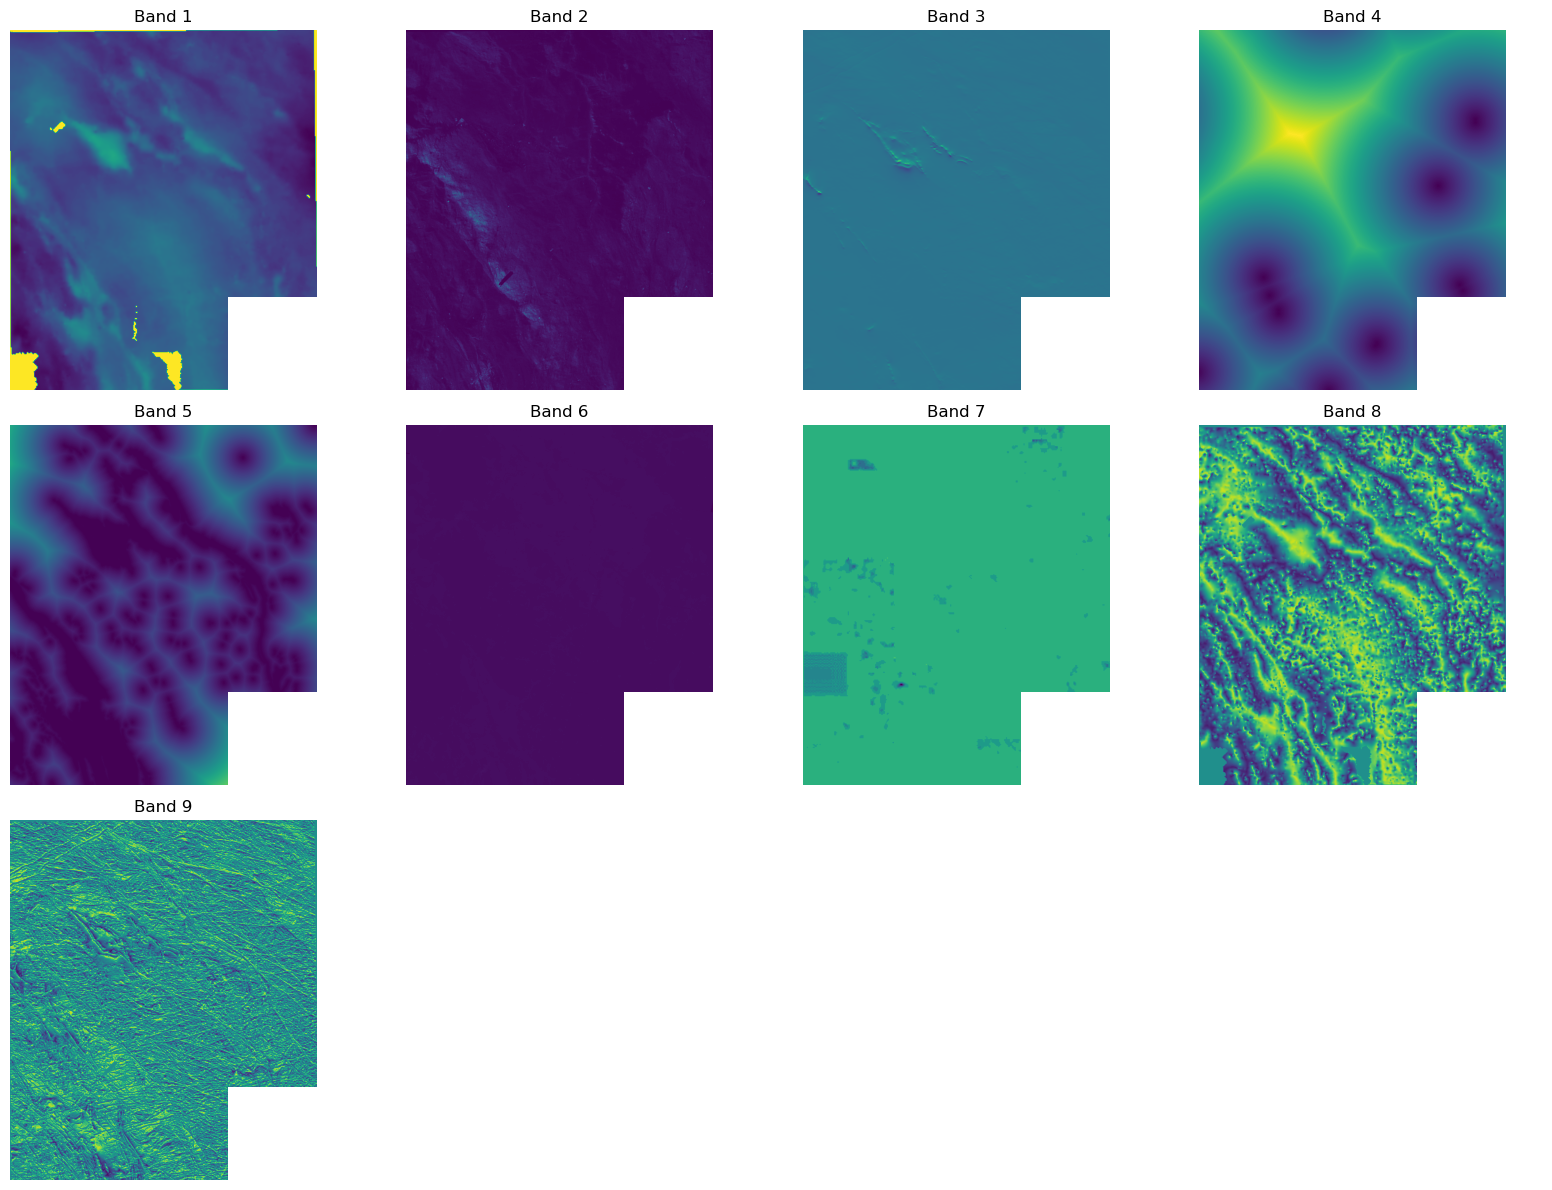

In [15]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("GEOTIFF/SOM_bhukosh_deposit.tif") as src:
    band_count = src.count
    nodata = src.nodata
    bands = []

    for i in range(1, band_count + 1):
        band = src.read(i).astype('float32')  
        if nodata is None:
            band = np.where(band == nodata, np.nan, band)
        
        bands.append(band)

cols = 4
rows = int(np.ceil(len(bands) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

for i, band in enumerate(bands):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    im = ax.imshow(band, cmap="viridis")
    ax.set_title(f"Band {i + 1}")
    ax.axis("off")

for j in range(len(bands), rows * cols):
    r, c = divmod(j, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis("off")

plt.tight_layout()
plt.show()

In [409]:
import rasterio
import pandas as pd
from rasterio.transform import xy
import numpy as np

with rasterio.open("GEOTIFF/SOM_bhukosh_deposit.tif") as src:
    band_count = src.count
    bands = [src.read(i + 1).flatten() for i in range(band_count)]  
    rows, cols = src.shape  

    coords = [xy(src.transform, row, col) for row in range(rows) for col in range(cols)]
    xs, ys = zip(*coords)

data = {
    "Longitude": xs,
    "Latitude": ys,
}

for i, band in enumerate(bands, 1):
    data[f"Band_{i}"] = band

df_SOM = pd.DataFrame(data)

In [411]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def load_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read()  # Read all bands
        profile = src.profile  # Store metadata
    return data, profile

file_path = "GEOTIFF/SOM_bhukosh_deposit.tif"
data, profile = load_geotiff(file_path)

data_reshaped = data.reshape(data.shape[0], -1).T  
data_cleaned = data_reshaped[~np.isnan(data_reshaped).any(axis=1)]  

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [413]:
data_scaled

array([[1.        , 0.        , 0.38360065, ..., 0.6363636 , 0.4968746 ,
        0.49995452],
       [1.        , 0.        , 0.38360065, ..., 0.6363636 , 0.4968746 ,
        0.49995452],
       [1.        , 0.        , 0.38360065, ..., 0.6363636 , 0.4968746 ,
        0.49995452],
       ...,
       [1.        , 0.        , 0.38360065, ..., 0.6363636 , 0.4968746 ,
        0.49995452],
       [1.        , 0.        , 0.38360065, ..., 0.6363636 , 0.4968746 ,
        0.49995452],
       [1.        , 0.        , 0.38360065, ..., 0.6363636 , 0.4968746 ,
        0.49995452]], dtype=float32)

In [415]:
data_scaled.shape

(3875526, 9)

In [417]:
som = MiniSom(x = 4, y = 4, input_len = data_scaled.shape[1], sigma = 0.5, learning_rate = 0.5,neighborhood_function='gaussian', random_seed=42)

In [419]:
som.random_weights_init(data_scaled)

In [421]:
som.train_random(data_scaled, num_iteration=1000)

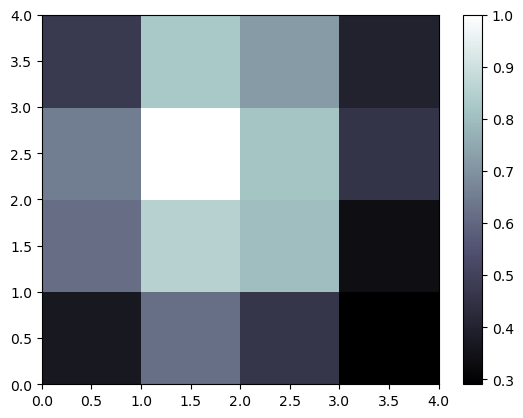

In [423]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']


show()

In [425]:
winner_coordinates = np.array([som.winner(x) for x in data_scaled])

In [427]:
cluster_map = np.ravel_multi_index(winner_coordinates.T, (4,4))


In [429]:
clustered_raster = np.full(data_reshaped.shape[0], np.nan)  
clustered_raster[~np.isnan(data_reshaped).any(axis=1)] = cluster_map  
clustered_raster = clustered_raster.reshape(profile["height"], profile["width"])

In [431]:
clustered_raster.shape

(2214, 1889)

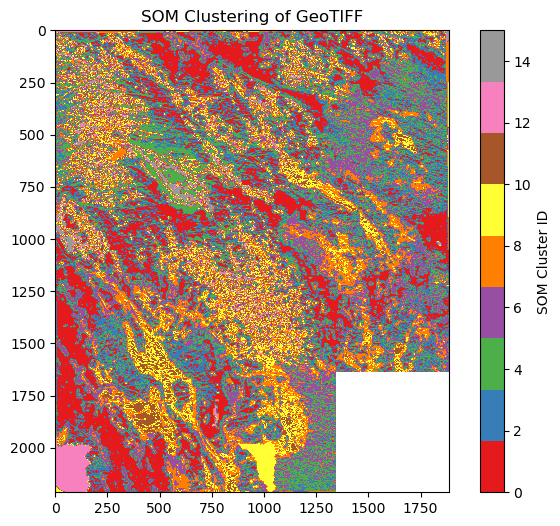

In [433]:
plt.figure(figsize=(8, 6))
plt.imshow(clustered_raster, cmap="Set1")
plt.colorbar(label="SOM Cluster ID")
plt.title("SOM Clustering of GeoTIFF")
plt.show()

In [435]:
num_nans = np.sum(np.isnan(data_scaled))
print(f"Total number of NaN values in data_scaled: {num_nans}")

Total number of NaN values in data_scaled: 0


In [437]:
df_SOM.shape

(4182246, 11)

In [439]:
df_SOM.isna().sum()

Longitude         0
Latitude          0
Band_1       306720
Band_2       306720
Band_3       306720
Band_4       306720
Band_5       306720
Band_6       306720
Band_7       306720
Band_8       306720
Band_9       306720
dtype: int64

In [441]:
df_SOM = df_SOM.dropna()

In [443]:
df_SOM.shape

(3875526, 11)

In [445]:
import numpy as np


winners = np.array([som.winner(x) for x in data_scaled])

cluster_map = {(i, j): f'Cluster{i * 4 + j}' for i in range(4) for j in range(4)}

clusters = np.array([cluster_map[tuple(w)] for w in winners])

df_SOM['Cluster'] = clusters


In [447]:
import geopandas as gpd
df_SOM_gdf = gpd.GeoDataFrame(df_SOM, geometry=gpd.points_from_xy(df_SOM.Longitude, df_SOM.Latitude), crs="EPSG:32643")

In [449]:
df_SOM_gdf.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

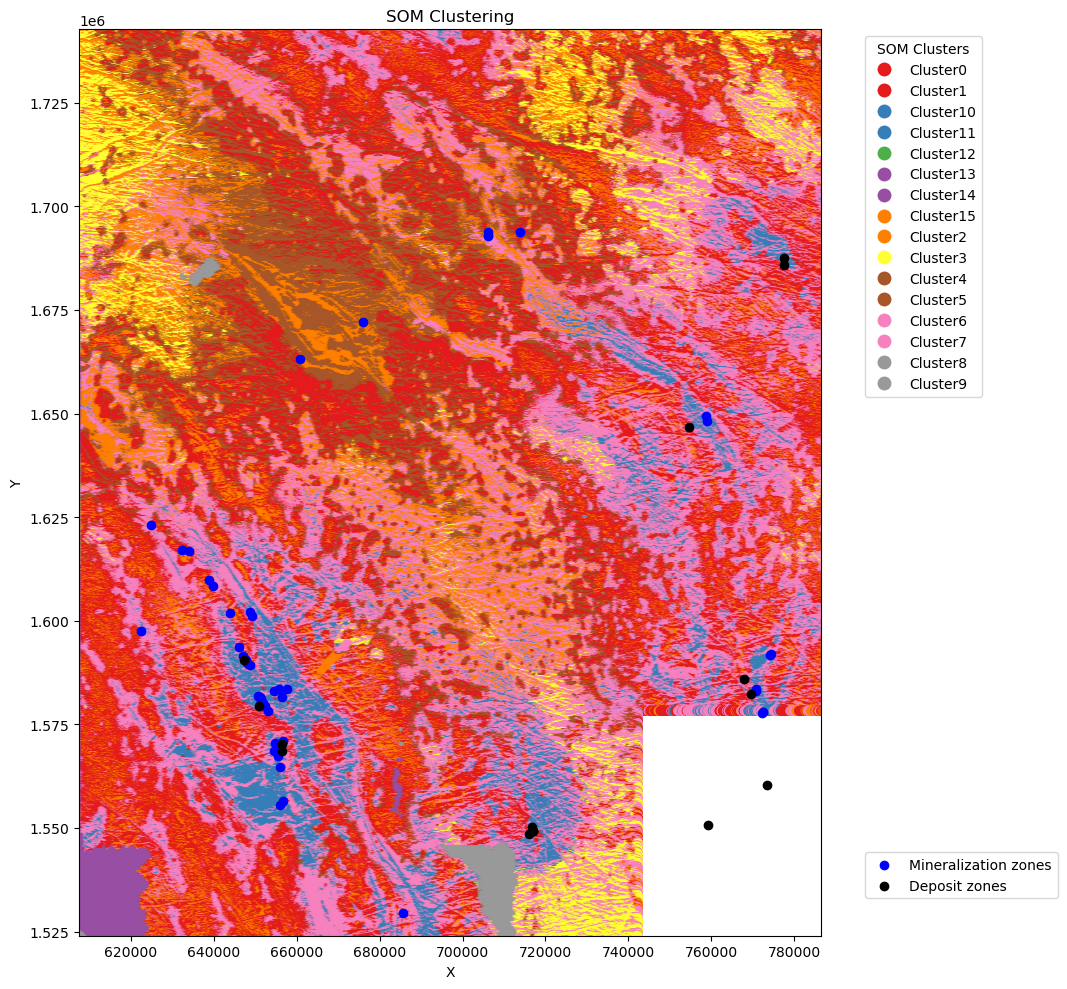

In [457]:
fig, ax = plt.subplots(figsize=(10,10))
df_SOM_gdf.plot(ax=ax,column='Cluster', cmap='Set1', legend=True)
df_min.plot(ax=ax, color = 'blue', label='Mineralization zones')
df_deposit_cu_au.plot(ax=ax, color = 'black', label='Deposit zones')
#plt.xlimit()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SOM Clustering")
legend1 = ax.get_legend()
if legend1:
    legend1.set_bbox_to_anchor((1.05, 1))
    legend1.set_title("SOM Clusters")
legend2 = ax.legend(bbox_to_anchor=(1.05, 0.1), loc='upper left')
ax.set_xlim(607500, 786500)
ax.set_ylim(1524000, 1742700)
ax.add_artist(legend1)
plt.tight_layout()
plt.savefig("SOM_cuau.jpg", bbox_inches='tight')
plt.show()

In [94]:
cluster_frequencies = df_SOM_gdf['Cluster'].value_counts().sort_values(ascending=False)
print(cluster_frequencies)


Cluster
Cluster6     674009
Cluster0     632812
Cluster7     527655
Cluster1     438659
Cluster15    320851
Cluster5     271228
Cluster2     268563
Cluster4     242082
Cluster3     214333
Cluster11    187014
Cluster13     42431
Cluster9      31239
Cluster8      13632
Cluster14      6084
Cluster12      4698
Cluster10       236
Name: count, dtype: int64


In [96]:
df_cluster = df_SOM_gdf.copy()

In [98]:
df_cluster['geometry'] = df_cluster.geometry.buffer(100)

In [100]:
import geopandas as gpd
from shapely.geometry import Point

joined = gpd.sjoin(df_cluster, df_deposit_cu_au, how='right', predicate='contains')
min_cluster_counts = joined['Cluster'].value_counts()

print("Mineralization counts per cluster:", min_cluster_counts.to_dict())

Mineralization counts per cluster: {'Cluster11': 20, 'Cluster7': 12, 'Cluster1': 6, 'Cluster6': 3}


In [102]:
df_non_deposits = df_SOM_gdf[(df_SOM_gdf['Cluster']=='Cluster0')].sample(n=100, axis=0, ignore_index=False)

In [104]:
df_non_deposits.to_csv("non_deposits_bhukosh.csv")

In [ ]:
########## Creating training data ##########

In [37]:
df_non_deposits = pd.read_csv("non_deposits_bhukosh.csv"). ## Reading Non-deposits file

In [39]:
df_non_deposits

Unnamed: 0  Longitude   Latitude     Band_1    Band_2      Band_3  \
0      1681977   684250.0  1653650.0 -83.653534  0.109823   64.430275   
1      2121569   629750.0  1630350.0 -81.289190  0.063869  115.055200   
2      3533192   683750.0  1555650.0 -79.547430  0.164984   42.247880   
3      1980528   693150.0  1637850.0 -79.007710  0.119096   41.427406   
4        76715   723050.0  1738650.0 -88.866800  0.033036  -54.280785   
..         ...        ...        ...        ...       ...         ...   
95     1443588   646750.0  1666250.0 -84.586010  0.268712  -40.997550   
96     2470571   772350.0  1611950.0 -88.832180  0.207521  -30.773588   
97      376657   682150.0  1722750.0 -85.879776  0.086827  -71.042720   
98     3045149   615650.0  1581450.0 -95.957520  0.128949   87.601750   
99       70724   690650.0  1738950.0 -88.026180  0.035403  126.942690   

       Band_4      Band_5    Band_6    Band_7    Band_8    Band_9   Cluster  \
0   70710.510   1294.4116  1.056872  0.636364 -0.633970 -0.815470  Cluster0   
1   43510.902   4951.1685  1.058296  0.636364 -0.332675 -0.038116  Cluster0   
2   30143.725   2500.8738  0.986622  0.636364 -1.402059 -0.635563  Cluster0   
3   62143.676   2829.9597  1.059761  0.636364 -0.505568 -0.457847  Cluster0   
4   46439.188  23208.9060  1.080292  0.636364 -0.320734 -0.889903  Cluster0   
..        ...         ...       ...       ...       ...       ...       ...   
95  75594.040  10326.6480  1.006734  0.636364 -0.539331 -1.127012  Cluster0   
96  26289.557   8222.3120  0.975684  0.636364 -0.467163 -0.483203  Cluster0   
97  43500.000   2206.7666  1.041096  0.636364  0.199465 -0.740297  Cluster0   
98  32984.336   2052.9841  0.996226  0.454545 -0.724713 -1.354506  Cluster0   
99  27652.756   4699.6787  1.032680  0.636364 -0.474593 -0.863130  Cluster0   

                  geometry  
0   POINT (684250 1653650)  
1   POINT (629750 1630350)  
2   POINT (683750 1555650)  
3   POINT (693150 1637850)  
4   POINT (723050 1738650)  
..                     ...  
95  POINT (646750 1666250)  
96  POINT (772350 1611950)  
97  POINT (682150 1722750)  
98  POINT (615650 1581450)  
99  POINT (690650 1738950)  

[100 rows x 14 columns]

In [63]:
from rasterio.windows import Window

def crop_windows(centers, window_size):
    width, height = src.width, src.height
    half = window_size // 2
    windows = []

    for x, y in centers:
        
        col = int((x - src.transform.c) / src.transform.a)
        row = int((y - src.transform.f) / src.transform.e)

        
        row_start = max(row - half, 0)
        row_end = min(row + half, height)
        col_start = max(col - half, 0)
        col_end = min(col + half, width)

        
        if row_end > row_start and col_end > col_start:
            window = Window(col_start, row_start, col_end - col_start, row_end - row_start)
            windows.append(window)
        else:
            print(f"Skipped invalid window at X={x}, Y={y} (row: {row_start}-{row_end}, col: {col_start}-{col_end})")

    return windows

In [37]:
df_deposit_cu_au['X'] = df_deposit_cu_au.geometry.centroid.x

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [39]:
df_deposit_cu_au['Y'] = df_deposit_cu_au.geometry.centroid.y

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [41]:
df_deposit_cu_au = df_deposit_cu_au[['X','Y','geometry']]

In [43]:
df_deposit_cu_au.head()

X             Y                        geometry
0  789476.975134  1.800043e+06   POINT (789476.975 1800042.78)
1  736007.037231  1.785870e+06  POINT (736007.037 1785869.965)
2  692435.159925  1.790058e+06    POINT (692435.16 1790057.54)
3  690684.839178  1.786353e+06  POINT (690684.839 1786353.277)
4  688695.207279  1.810315e+06  POINT (688695.207 1810314.625)

In [73]:
deposit_centers = df_deposit_cu_au[['X','Y']].values.tolist()

In [75]:
len(deposit_centers)

47

In [77]:
non_deposit_centers = df_non_deposits[['Longitude','Latitude']].values.tolist()

In [79]:
len(non_deposit_centers)

100

In [81]:
deposit_windows = crop_windows(deposit_centers, window_size=50)

Skipped invalid window at X=789476.9751335366, Y=1800042.7795219717 (row: 0--548, col: 1794-1844)
Skipped invalid window at X=736007.0372306288, Y=1785869.9645506127 (row: 0--406, col: 1260-1310)
Skipped invalid window at X=692435.1599245509, Y=1790057.5400299903 (row: 0--448, col: 824-874)
Skipped invalid window at X=690684.8391777655, Y=1786353.277168591 (row: 0--411, col: 806-856)
Skipped invalid window at X=688695.2072790447, Y=1810314.6248054476 (row: 0--651, col: 786-836)
Skipped invalid window at X=685274.9053878969, Y=1793684.9058533588 (row: 0--484, col: 752-802)
Skipped invalid window at X=679913.9657347157, Y=1795484.6677918392 (row: 0--502, col: 699-749)
Skipped invalid window at X=676394.9553794935, Y=1789922.9026553885 (row: 0--447, col: 663-713)
Skipped invalid window at X=606794.3296886564, Y=1810679.2718037874 (row: 0--654, col: 0-18)
Skipped invalid window at X=606798.8654129229, Y=1809757.3339667136 (row: 0--645, col: 0-18)
Skipped invalid window at X=855608.51903456

In [83]:
len(deposit_windows)

17

In [85]:
non_deposit_windows = crop_windows(non_deposit_centers, window_size = 50)

In [87]:
import tensorflow as tf

In [89]:
from rasterio.windows import transform
import numpy as np
import os
import rasterio


NODATA_THRESHOLD = 0.9

for i, window in enumerate(deposit_windows):
    with rasterio.open("GEOTIFF/final_stacked_cuau.tif") as src:
        nodata_val = src.nodata  

        
        patch = src.read(window=window)  

        if nodata_val is not None:
            nodata_mask = (patch == nodata_val)
            nodata_fraction = np.mean(nodata_mask)

            if nodata_fraction > NODATA_THRESHOLD:
                print(f"Skipping patch {i} due to high NoData fraction: {nodata_fraction:.2f}")
                continue  

        
        profile = src.profile
        profile.update({
            "height": window.height,
            "width":  window.width,
            "transform": transform(window, src.transform)
        })

        output_path = os.path.join("train_dir_cuau", "1", f"deposit_output_{i}.tiff")
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        with rasterio.open(output_path, "w", **profile) as dst:
            dst.write(patch)
            


In [91]:
from rasterio.windows import transform


for i, window in enumerate(non_deposit_windows):
    with rasterio.open("GEOTIFF/final_stacked_cuau.tif") as src:
        profile = src.profile  # Copy metadata
        profile.update({
        "height": window.height,
        "width":  window.width,
        "transform": transform(window, src.transform)
        })
        output_path = os.path.join("train_dir_cuau", "0", f"non_deposit_output_{i}.tiff")
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        with rasterio.open(output_path, "w", **profile) as dst:
            for i in range(1, src.count + 1):  # Loop through bands
                dst.write(src.read(i, window=window), i)

In [148]:
import os
import numpy as np
import tifffile as tiff
import albumentations as A
import rasterio
from rasterio.transform import from_origin


train_dir = "train_dir_cuau"
output_dir = "augmented_dir_cuau"

os.makedirs(output_dir, exist_ok=True)


augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),         # Flip horizontally
    A.VerticalFlip(p=0.5),           # Flip vertically
    A.RandomRotate90(p=0.5),         # Random 90-degree rotation
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=45, p=0.5),  # Shift, scale, rotate
    A.GaussianBlur(blur_limit=(3,5), p=0.2),  # Apply blur
    A.Resize(50, 50, always_apply=True)
], additional_targets={"image": "image"})  

def augment_4band_tiff(class_name, num_augmented_images=100):
    class_path = os.path.join(train_dir, class_name)
    save_path = os.path.join(output_dir, class_name)
    os.makedirs(save_path, exist_ok=True)

    for filename in os.listdir(class_path):
        if filename.lower().endswith(".tiff") or filename.lower().endswith(".tif"):
            original_file_path = os.path.join(class_path, filename)
            try:
                with rasterio.open(original_file_path) as src:
                    original_img = src.read()  
                    original_profile = src.profile

                    if original_img.shape[0] != 16 or original_img.shape[1] != 50 or original_img.shape[2] != 50:
                        print(f"Skipping {original_file_path}: Not a 16-band image with shape (50, 50)")
                        continue

                    for i in range(num_augmented_images):
                        augmented = augmentations(image=original_img.transpose(1, 2, 0)) 
                        aug_img = augmented["image"].transpose(2, 0, 1) 

                        aug_filename = f"aug_{os.path.splitext(filename)[0]}_{i}.tiff"
                        aug_file_path = os.path.join(save_path, aug_filename)

                        
                        with rasterio.open(aug_file_path, 'w', **original_profile) as dst:
                            dst.write(aug_img.astype(original_profile['dtype']))

                

            except Exception as e:
                print(f"Error processing {original_file_path}: {e}")


augment_4band_tiff("1")
augment_4band_tiff("0")

print("Augmentation complete.")

/opt/anaconda3/lib/python3.12/site-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/var/folders/cj/c3lxhrz916l_n171dhdhbg8h0000gp/T/ipykernel_8952/552916130.py:21: UserWarning: Argument(s) 'always_apply' are not valid for transform Resize
  A.Resize(50, 50, always_apply=True)


Skipping train_dir_cuau/1/deposit_output_11.tiff: Not a 16-band image with shape (50, 50)
Skipping train_dir_cuau/1/deposit_output_16.tiff: Not a 16-band image with shape (50, 50)
Skipping train_dir_cuau/0/non_deposit_output_22.tiff: Not a 16-band image with shape (50, 50)
Skipping train_dir_cuau/0/non_deposit_output_11.tiff: Not a 16-band image with shape (50, 50)
Augmentation complete.


In [150]:
import os
import numpy as np
from osgeo import gdal


WINDOW_SIZE = (50, 50)  
STEP_SIZE = 20  
test_dir = "test_dir_cuau"
patch_dir = os.path.join("test_dir_cuau", "patches")  
os.makedirs(patch_dir, exist_ok=True)  

def save_tiff(array, filename, geotransform, projection):
    """Save an image patch as a GeoTIFF file"""
    driver = gdal.GetDriverByName("GTiff")
    H, W, bands = array.shape
    dataset = driver.Create(filename, W, H, bands, gdal.GDT_Float32)

    if dataset is None:
        print(f" ERROR: Failed to create {filename}")
        return

    dataset.SetGeoTransform(geotransform)
    dataset.SetProjection(projection)

    for b in range(bands):
        dataset.GetRasterBand(b + 1).WriteArray(array[:, :, b])

    dataset.FlushCache()
    dataset = None  # Close dataset
    print(f" Saved: {filename}")

def generate_patches():
    patch_id = 0
    for filename in os.listdir(test_dir):
        file_path = os.path.join(test_dir, filename)
        print(f" Processing: {file_path}")

        dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
        if dataset is None:
            print(f" ERROR: Unable to open {file_path}. Skipping...")
            continue

        geotransform = dataset.GetGeoTransform()
        projection = dataset.GetProjection()
        img = dataset.ReadAsArray()

        if img is None:
            print(f"⚠️ ERROR: Could not read {file_path}. Skipping...")
            continue

        nodata_val = dataset.GetRasterBand(1).GetNoDataValue()
        if nodata_val is not None:
            nodata_mask = (img == nodata_val)
        else:
            nodata_mask = np.zeros_like(img, dtype=bool)

        img = np.moveaxis(img, 0, -1)  
        nodata_mask = np.moveaxis(nodata_mask, 0, -1)  

        H, W, _ = img.shape

        for i in range(0, H - WINDOW_SIZE[0] + 1, STEP_SIZE):
            for j in range(0, W - WINDOW_SIZE[1] + 1, STEP_SIZE):
                patch = img[i:i+WINDOW_SIZE[0], j:j+WINDOW_SIZE[1], :]
                patch_mask = nodata_mask[i:i+WINDOW_SIZE[0], j:j+WINDOW_SIZE[1], :]

                
                if np.mean(patch_mask) > 0.9:
                    continue  

                new_geotransform = (
                    geotransform[0] + j * geotransform[1],
                    geotransform[1],
                    geotransform[2],
                    geotransform[3] + i * geotransform[5],
                    geotransform[4],
                    geotransform[5]
                )

                patch_filename = os.path.join(patch_dir, f"test_patch_{patch_id}.tif")
                save_tiff(patch, patch_filename, new_geotransform, projection)
                patch_id += 1

        

generate_patches()

 Processing: test_dir_cuau/patches
 ERROR: Unable to open test_dir_cuau/patches. Skipping...
 Processing: test_dir_cuau/final_stacked_cuau.tif
 Saved: test_dir_cuau/patches/test_patch_0.tif
 Saved: test_dir_cuau/patches/test_patch_1.tif
 Saved: test_dir_cuau/patches/test_patch_2.tif
 Saved: test_dir_cuau/patches/test_patch_3.tif
 Saved: test_dir_cuau/patches/test_patch_4.tif
 Saved: test_dir_cuau/patches/test_patch_5.tif
 Saved: test_dir_cuau/patches/test_patch_6.tif
 Saved: test_dir_cuau/patches/test_patch_7.tif
 Saved: test_dir_cuau/patches/test_patch_8.tif
 Saved: test_dir_cuau/patches/test_patch_9.tif
 Saved: test_dir_cuau/patches/test_patch_10.tif
 Saved: test_dir_cuau/patches/test_patch_11.tif
 Saved: test_dir_cuau/patches/test_patch_12.tif
 Saved: test_dir_cuau/patches/test_patch_13.tif
 Saved: test_dir_cuau/patches/test_patch_14.tif
 Saved: test_dir_cuau/patches/test_patch_15.tif
 Saved: test_dir_cuau/patches/test_patch_16.tif
 Saved: test_dir_cuau/patches/test_patch_17.tif
 Sa

In [ ]:
################ Training the models ######################

In [45]:
train_dir = "train_dir_cuau"

import os
IMG_SIZE = 50


def load_tiff_data(train_dir, class_name):
    class_path = os.path.join(train_dir, class_name)
    X, Y = [], []
    for filename in os.listdir(class_path):
        file_path = os.path.join(class_path, filename)
        dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
        if dataset is None:
            print(f"Skipping {filename}, could not be opened.")
            continue
        img = dataset.ReadAsArray()
        img = np.moveaxis(img, 0, -1)

        if img.shape[:2] != (IMG_SIZE, IMG_SIZE):
            print(f"Skipping {filename}, incorrect shape: {img.shape}")
            continue

        #if np.isnan(img).any():
        #    print(f"Replacing NaNs in {filename}")
        #    img = np.nan_to_num(img, nan=0.0)

        X.append(img)
        Y.append(int(class_name))
    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.int32)

X1,Y1 = load_tiff_data("train_dir_cuau","1")
X0,Y0 = load_tiff_data("train_dir_cuau","0")

Skipping deposit_output_11.tiff, incorrect shape: (20, 50, 16)
Skipping deposit_output_16.tiff, incorrect shape: (50, 13, 16)
Skipping non_deposit_output_22.tiff, incorrect shape: (29, 50, 16)
Skipping non_deposit_output_11.tiff, incorrect shape: (50, 49, 16)


In [47]:
X1.shape

(1515, 50, 50, 16)

In [49]:
X0.shape

(9898, 50, 50, 16)

In [51]:
np.sum(np.isnan(X1))

7299344

In [53]:
valid_mask = ~np.isnan(X1).any(axis=(1, 2, 3))  


X1_clean = X1[valid_mask]
Y1_clean = Y1[valid_mask]

print("Original shape:", X1.shape)
print("Clean shape:", X1_clean.shape)
print("Clean shape:", Y1_clean.shape)

Original shape: (1515, 50, 50, 16)
Clean shape: (1313, 50, 50, 16)
Clean shape: (1313,)


In [55]:
X = np.concatenate((X1_clean, X0), axis=0)

In [57]:
Y = np.concatenate((Y1_clean,Y0), axis =0)

In [59]:
X.shape

(11211, 50, 50, 16)

In [61]:
test_dir = "test_dir_cuau/patches"
IMG_SIZE = 50

def load_test_data(test_dir):
    X_test = []
    coords  = []

    for filename in os.listdir(test_dir):
        file_path = os.path.join(test_dir, filename)
        dataset = gdal.Open(file_path, gdal.GA_ReadOnly)

        if dataset is None:
            print(f"Skipping {filename}, could not be opened")
            continue

        img = dataset.ReadAsArray()
        img = np.moveaxis(img, 0, -1)

        if img.shape[:2] != (IMG_SIZE, IMG_SIZE):
            print(f"Skipping {filename}, incorrect shape: {img.shape}")
            continue

        # Handle NaNs
        #if np.isnan(img).any():
        #    print(f"NaNs found in {filename}, replacing with 0.")
        #    img = np.nan_to_num(img, nan=0.0)

        geotransform = dataset.GetGeoTransform()
        if geotransform is None:
            print(f"Skipping {filename}, missing geotransform.")
            continue

        
        X_center = geotransform[0] + (IMG_SIZE / 2) * geotransform[1]
        Y_center = geotransform[3] + (IMG_SIZE / 2) * geotransform[5]

        X_test.append(img)
        coords.append([X_center, Y_center])

    return np.array(X_test, dtype=np.float32), np.array(coords, dtype=np.float32)

result = load_test_data(test_dir)

if isinstance(result, tuple) and len(result) ==2:
    X_test, center_coords = result
else:
    raise ValueError("Unexpected return structure from load_test_data_with_center_coords")


In [63]:
X_test.shape

(10028, 50, 50, 16)

In [65]:
valid_mask = ~np.isnan(X_test).any(axis=(1, 2, 3))  


X_test_clean = X_test[valid_mask]


print("Original shape:", X_test.shape)
print("Clean shape:", X_test_clean.shape)


Original shape: (10028, 50, 50, 16)
Clean shape: (9245, 50, 50, 16)


In [67]:
np.sum(np.isnan(X_test_clean))

0

In [69]:
center_coords = center_coords[valid_mask]

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from osgeo import gdal

In [127]:
from tensorflow import keras

In [129]:
from tensorflow.keras.models import Sequential


In [131]:
import tensorflow as tf

In [71]:
from sklearn.preprocessing import MinMaxScaler

BANDS = 16

X_reshaped = X.reshape(-1, BANDS)
X_test_reshaped = X_test_clean.reshape(-1, BANDS)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

X_mod = X_scaled.reshape(X.shape)
X_test_mod = X_test_scaled.reshape(X_test_clean.shape)

In [73]:
BANDS = 16
input_shape = (IMG_SIZE, IMG_SIZE, BANDS)

In [93]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer = Adam(learning_rate=0.001), loss ='binary_crossentropy', metrics= ['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
history = model.fit(X_mod, Y, epochs=20, batch_size = 16)

Epoch 1/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9205 - loss: 0.2116
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9734 - loss: 0.0821
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9745 - loss: 0.0899 
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9855 - loss: 0.0516
Epoch 5/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9854 - loss: 0.0550
Epoch 6/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9856 - loss: 0.0498
Epoch 7/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9874 - loss: 0.0463
Epoch 8/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9845 - loss: 0.0492
Epoch 9/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9897 - loss: 0.0400
Epoch 10/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9889 - loss: 0.0393
Epoch 11/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9852 - loss: 0.0490 
Epoch 12/20
701/701 ━━━━━━━━━━━━━━━━━━

In [99]:
y_predict = model.predict(X_test_mod)

289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 


(array([7273.,   91.,   68.,   64.,   56.,   44.,   41.,   50.,   90.,
        1468.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

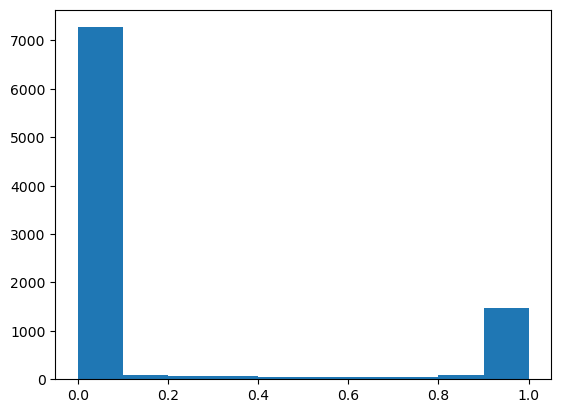

In [101]:
plt.hist(y_predict)

In [218]:
predictions = (y_predict > 0.90).astype(int)  


In [220]:
UTMX = center_coords[:,0]
UTMY = center_coords[:,1]

In [103]:
df_pred = pd.DataFrame(np.column_stack([UTMX, UTMY ,y_predict]), columns=['X','Y','y_pred'])

<Axes: >

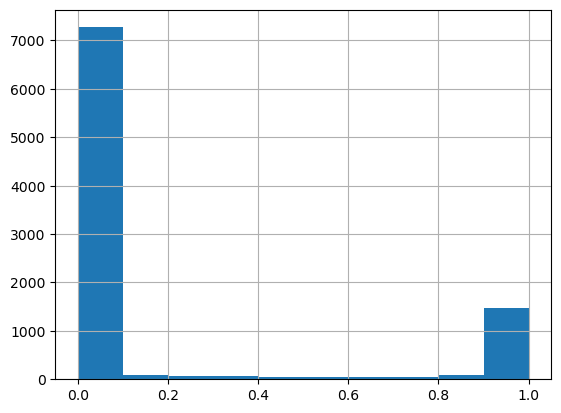

In [105]:
df_pred['y_pred'].hist()

In [453]:
df_pred_gpd = gpd.GeoDataFrame(df_pred, geometry=gpd.points_from_xy(df_pred.X, df_pred.Y), crs="EPSG:32643")

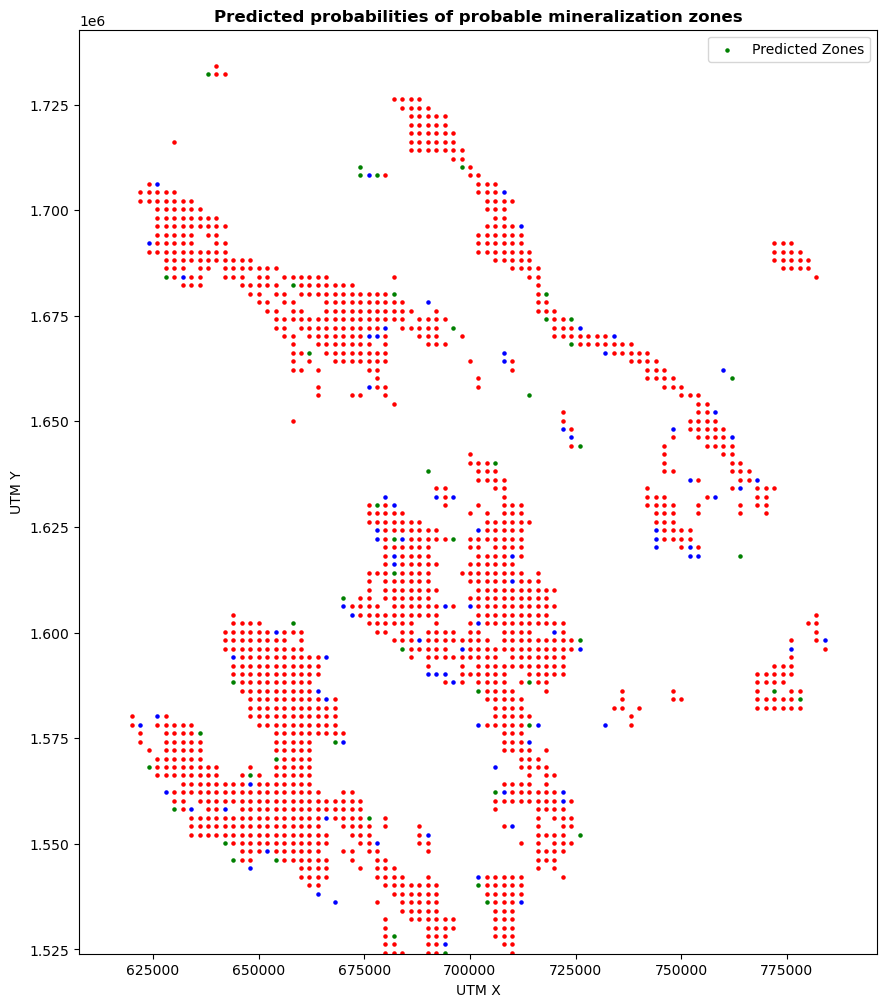

In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

df_pred_gpd[(df_pred_gpd['y_pred'] > 0.7) & (df_pred_gpd['y_pred'] < 0.8)].plot(
    ax=ax, color='green', label="Predicted Zones", markersize=5
)
df_pred_gpd[(df_pred_gpd['y_pred'] > 0.8) & (df_pred_gpd['y_pred'] < 0.9)].plot(
    ax=ax, color='blue', label="Predicted Zones", markersize=5
)
df_pred_gpd[(df_pred_gpd['y_pred'] > 0.9) & (df_pred_gpd['y_pred'] < 1.0)].plot(
    ax=ax, color='red', label="Predicted Zones", markersize=5
)


plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')
ax.set_xlim(607500, 796350)
ax.set_ylim(1524000, 1742700)
plt.legend(["Predicted Zones"], loc='upper right')

plt.show()


In [199]:
df_pred_gpd = gpd.GeoDataFrame(df_pred, geometry=gpd.points_from_xy(df_pred.X, df_pred.Y), crs="EPSG:32643")

In [242]:
df_pred_gpd.to_file("cuau_pred.shp")

In [201]:
df_pred_gpd[df_pred_gpd['y_pred']==1].to_file("cuau_pred_1.shp")

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(


In [244]:
df_pred_gpd.to_csv("cuau_pred.csv")

<Axes: >

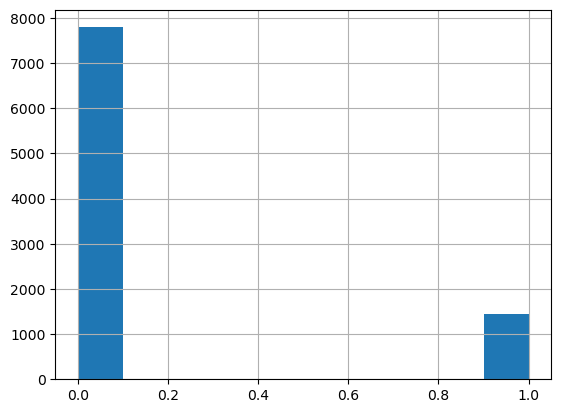

In [201]:
df_pred['y_pred'].hist()

In [203]:
df_pred_gpd = gpd.GeoDataFrame(df_pred, geometry=gpd.points_from_xy(df_pred.X, df_pred.Y), crs="EPSG:32643")

In [211]:
df_pred_gpd.columns

Index(['Unnamed: 0', 'X', 'Y', 'y_pred', 'geometry'], dtype='object')

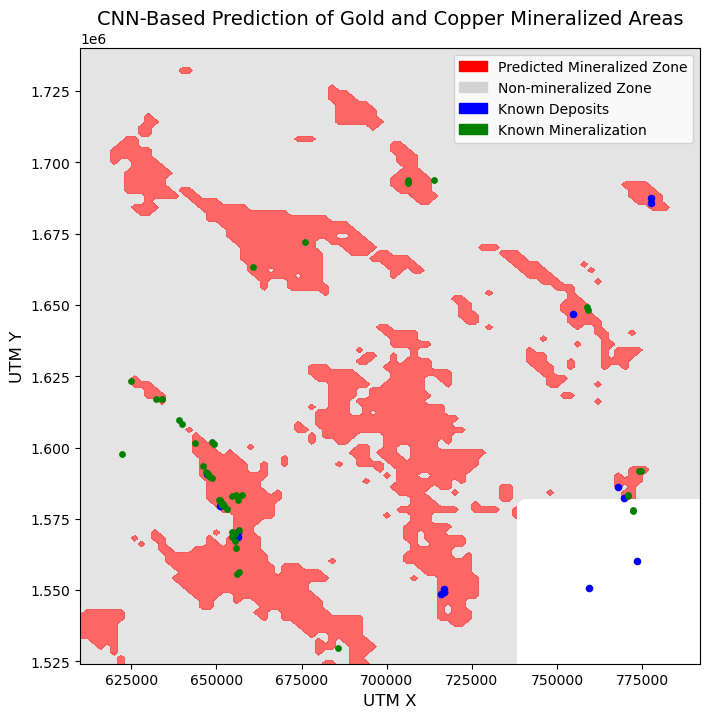

<Figure size 640x480 with 0 Axes>

In [267]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X = df_pred_gpd['X'].values
Y = df_pred_gpd['Y'].values
Z = df_pred_gpd['y_pred'].values
deposit_x = df_deposit_cu_au['X'].values
deposit_y = df_deposit_cu_au['Y'].values
mineral_x = df_min['X'].values
mineral_y = df_min['Y'].values

xi = np.unique(X)
yi = np.unique(Y)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X)):
    x_idx = np.where(xi == X[i])[0][0]
    y_idx = np.where(yi == Y[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
mineral_x = np.array(mineral_x)
mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
mineral_x_clipped = mineral_x[mineral_mask]
mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(8, 8))



contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("CNN-Based Prediction of Gold and Copper Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits')
black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot, black_dot], loc='upper right')

plt.show()
plt.savefig("CNN_prediction_cuau.jpg")

In [248]:
### Ensemble learning ###

In [45]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, AveragePooling2D,
                                     Flatten, Dense, Dropout, BatchNormalization,
                                     Add, Activation, GlobalAveragePooling2D)
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Input, Conv2D, Dense, Lambda, GlobalAveragePooling1D


input_shape = (50,50,16)

# 1. Custom CNN (Baseline)
def build_model_a():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# 2. Deeper CNN with Dropout

def build_model_b():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# 3. LeNet-style CNN
def build_model_c():
    model = Sequential([
        Conv2D(6, (5, 5), activation='relu', input_shape=input_shape),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, (5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# 4. ResNet-like CNN

def residual_block(x, filters):
    shortcut = x

    
    if x.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same')(shortcut)

    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x


def build_model_d():
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = residual_block(x, 32)
    x = MaxPooling2D((2, 2))(x)
    x = residual_block(x, 64)
    x = GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

# 5. CNN with Attention Block (Tiny ViT-inspired)

def build_model_e():
    inputs = Input(shape=(50, 50, 16))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Flatten spatial dimensions (H, W) into sequence
    def reshape_to_sequence(tensor):
        shape = tf.shape(tensor)
        return tf.reshape(tensor, (shape[0], -1, shape[-1]))  # (batch_size, seq_len, channels)

    x_seq = Lambda(reshape_to_sequence)(x)

    # Compute attention
    query = Dense(64)(x_seq)
    key = Dense(64)(x_seq)
    value = Dense(64)(x_seq)

    def scaled_dot_product_attention(qkv):
        query, key, value = qkv
        scores = tf.matmul(query, key, transpose_b=True)
        scores = tf.nn.softmax(scores, axis=-1)
        return tf.matmul(scores, value)

    attention = Lambda(scaled_dot_product_attention)([query, key, value])

    x = GlobalAveragePooling1D()(attention)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs, outputs)

# Compile models
def compile_model(model):
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Ensemble prediction (soft voting)
def ensemble_predict(models, X):
    preds = [model.predict(X) for model in models]
    avg_pred = np.mean(preds, axis=0)
    return (avg_pred > 0.5).astype(int)



In [49]:
model_a = compile_model(build_model_a())
model_b = compile_model(build_model_b())
model_c = compile_model(build_model_c())
model_d = compile_model(build_model_d())
model_e = compile_model(build_model_e())

model_a.fit(X_mod, Y, epochs=10, batch_size=32)
model_b.fit(X_mod, Y, epochs=10, batch_size=32)
model_c.fit(X_mod, Y, epochs=10, batch_size=32)
model_d.fit(X_mod, Y, epochs=10, batch_size=32)
model_e.fit(X_mod, Y, epochs=10, batch_size=32)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9052 - loss: 0.2304
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9661 - loss: 0.0957
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9766 - loss: 0.0748
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9863 - loss: 0.0503
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9836 - loss: 0.0549
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9854 - loss: 0.0464 
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9755 - loss: 0.0733
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9856 - loss: 0.0485
Epoch 9/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9896 - loss: 0.0396
Epoch 10/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9886 - loss: 0.0419
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9163 - loss: 0.2298
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 

In [55]:

models = [model_a, model_b, model_c, model_d, model_e]

y_pred = ensemble_predict(models, X_test_mod)


289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
289/289 ━━━━━━━━━━━━━━━━━━━━ 101s 347ms/step


In [61]:
UTMX = center_coords[:,0]
UTMY = center_coords[:,1]

In [63]:
df_pred_ensemble = pd.DataFrame(np.column_stack([UTMX, UTMY , y_pred]), columns=['X','Y','y_pred'])

<Axes: >

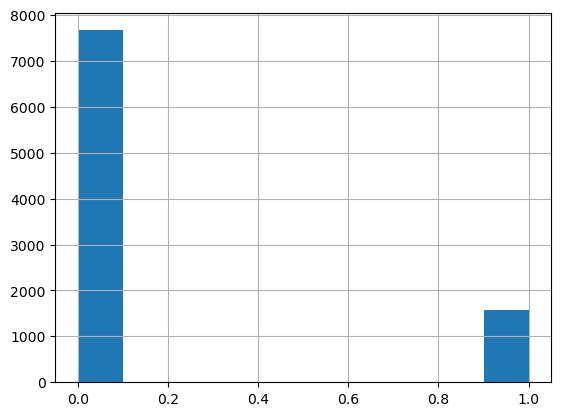

In [65]:
df_pred_ensemble['y_pred'].hist()

In [205]:
df_pred_ensemble_gpd = gpd.GeoDataFrame(df_pred_ensemble, geometry=gpd.points_from_xy(df_pred_ensemble.X, df_pred_ensemble.Y), crs="EPSG:32643")

In [89]:
df_pred_ensemble_gpd.to_file("cuau_ensemble_pred.shp")

In [207]:
df_pred_ensemble_gpd[df_pred_ensemble_gpd['y_pred']==1].to_file("cuau_ensemble_pred_1.shp")

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(


In [91]:
df_pred_ensemble_gpd.to_csv("cuau_ensemble_pred.csv")

In [203]:
df_pred_ensemble = pd.read_csv("cuau_ensemble_pred.csv")

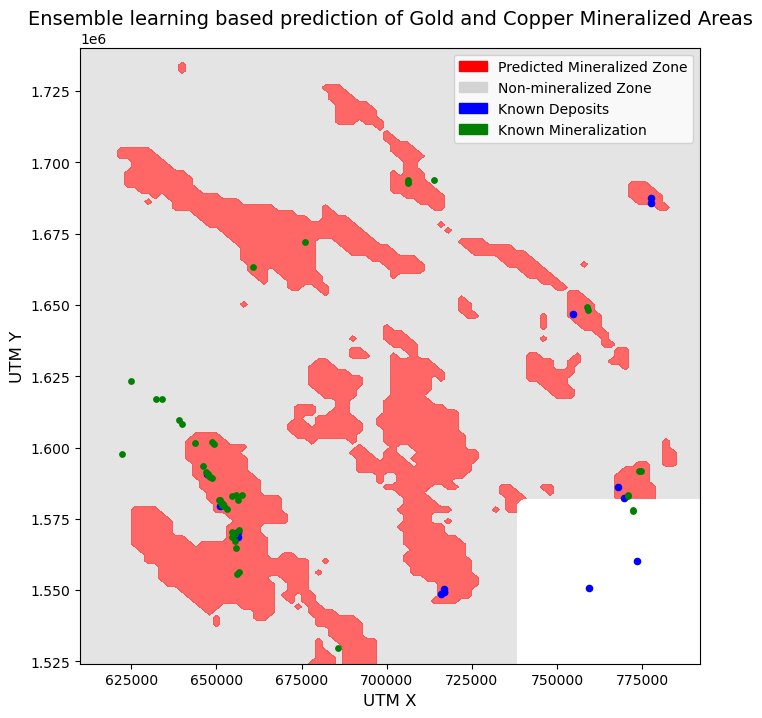

<Figure size 640x480 with 0 Axes>

In [281]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coords = df_pred_ensemble_gpd['X'].values
Y_coords = df_pred_ensemble_gpd['Y'].values
Z = df_pred_ensemble_gpd['y_pred'].values
deposit_x = df_deposit_cu_au['X'].values
deposit_y = df_deposit_cu_au['Y'].values
mineral_x = df_min['X'].values
mineral_y = df_min['Y'].values

xi = np.unique(X_coords)
yi = np.unique(Y_coords)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X_coords)):
    x_idx = np.where(xi == X_coords[i])[0][0]
    y_idx = np.where(yi == Y_coords[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
mineral_x = np.array(mineral_x)
mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
mineral_x_clipped = mineral_x[mineral_mask]
mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(8, 8))



contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("Ensemble learning based prediction of Gold and Copper Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits')
black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot, black_dot], loc='upper right')


plt.savefig("cuau_ensemble_learning.jpg")
plt.show()

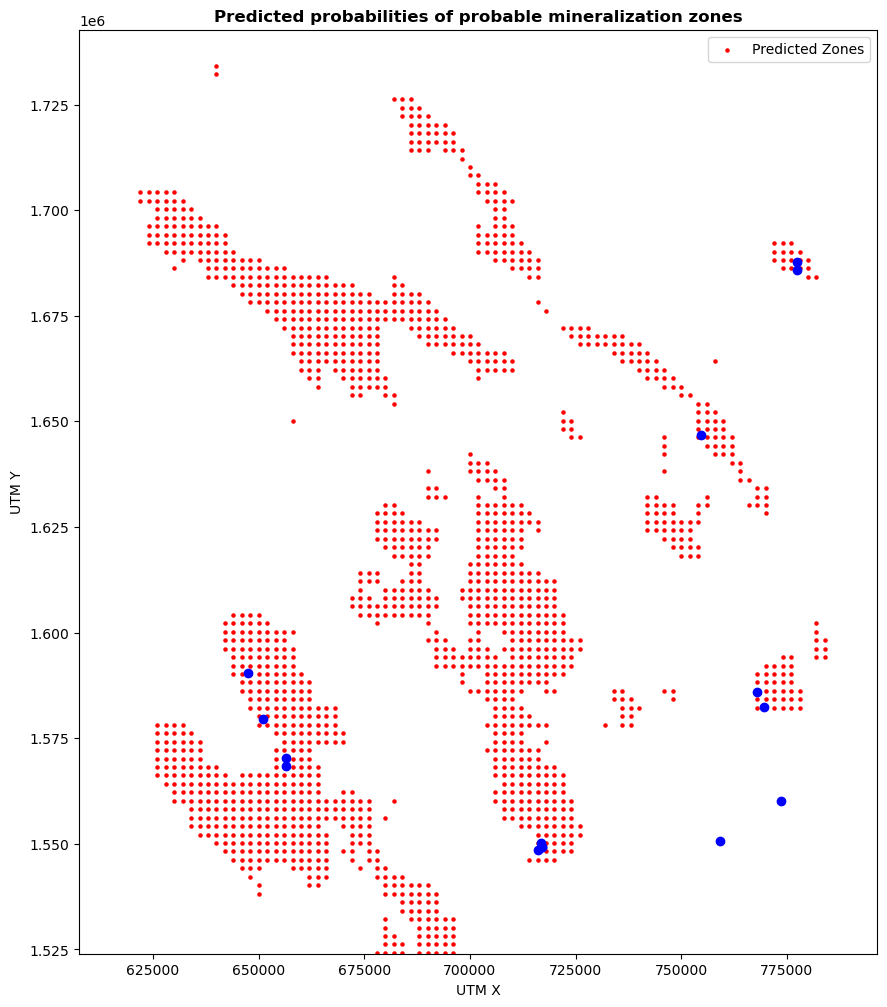

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

df_pred_ensemble_gpd[df_pred_ensemble_gpd['y_pred'] == 1].plot(
    ax=ax, color='red', label="Predicted Zones", markersize=5
)
df_deposit_cu_au.plot(ax=ax, color='blue', label='Deposits')

# Labels and title
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')
ax.set_xlim(607500, 796350)
ax.set_ylim(1524000, 1742700)
plt.legend(["Predicted Zones"], loc='upper right')

plt.show()

In [ ]:
##### Calculating the confusion matrix ########

In [121]:
df_deposit_cu_au.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [129]:
df_deposit_cu_au_buffer = df_deposit_cu_au.buffer(500)  


In [307]:
df_pred_gpd

Unnamed: 0         X          Y  y_pred                geometry  label
0              0  620000.0  1664200.0     0.0  POINT (620000 1664200)      0
1              1  646000.0  1628200.0     0.0  POINT (646000 1628200)      0
2              2  688000.0  1600200.0     0.0  POINT (688000 1600200)      0
3              3  666000.0  1712200.0     0.0  POINT (666000 1712200)      0
4              4  722000.0  1524200.0     0.0  POINT (722000 1524200)      0
...          ...       ...        ...     ...                     ...    ...
9240        9240  650000.0  1600200.0     0.0  POINT (650000 1600200)      0
9241        9241  670000.0  1684200.0     0.0  POINT (670000 1684200)      0
9242        9242  644000.0  1628200.0     0.0  POINT (644000 1628200)      0
9243        9243  700000.0  1648200.0     0.0  POINT (700000 1648200)      0
9244        9244  654000.0  1664200.0     0.0  POINT (654000 1664200)      0

[9245 rows x 6 columns]

In [361]:
df_pred_gpd['label']=0
for buffer in df_deposit_cu_au_buffer:
    df_pred_gpd.loc[df_pred_gpd.geometry.within(buffer), 'label'] = 1

In [375]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = df_pred_gpd['label']
y_pred_binary = (df_pred_gpd['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.8432666306111412
Precision: 0.0027529249827942187
Recall: 1.0
F1 Score: 0.00549073438572409
Confusion Matrix:
 [[7792 1449]
 [   0    4]]


In [377]:
report = classification_report(y_true, y_pred_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.843199  0.914930  9241.000000
1              0.002753  1.000000  0.005491     4.000000
accuracy       0.843267  0.843267  0.843267     0.843267
macro avg      0.501376  0.921599  0.460210  9245.000000
weighted avg   0.999569  0.843267  0.914536  9245.000000


In [379]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

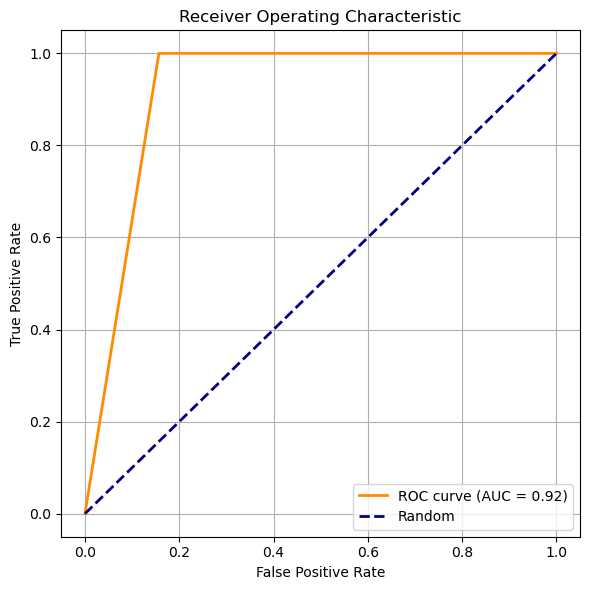

In [381]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_cnn.jpg")
plt.show()


In [383]:
df_pred_ensemble_gpd['label']=0
for buffer in df_deposit_cu_au_buffer:
    df_pred_ensemble_gpd.loc[df_pred_ensemble_gpd.geometry.within(buffer), 'label'] = 1

In [385]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = df_pred_ensemble_gpd['label']
y_pred_binary = (df_pred_ensemble_gpd['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.8295294753921039
Precision: 0.002531645569620253
Recall: 1.0
F1 Score: 0.005050505050505051
Confusion Matrix:
 [[7665 1576]
 [   0    4]]


In [387]:
report = classification_report(y_true, y_pred_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.829456  0.906779  9241.000000
1              0.002532  1.000000  0.005051     4.000000
accuracy       0.829529  0.829529  0.829529     0.829529
macro avg      0.501266  0.914728  0.455915  9245.000000
weighted avg   0.999568  0.829529  0.906389  9245.000000


In [389]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

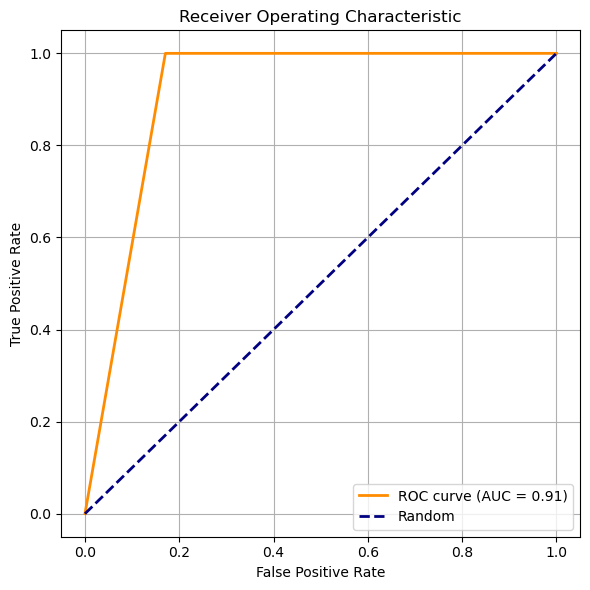

In [391]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_ensemble.jpg")
plt.show()

In [ ]:
######## GCNN ########

In [139]:
X_mod.shape

(111, 50, 50, 16)

In [159]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, global_mean_pool
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader  
from sklearn.neighbors import NearestNeighbors


num_samples, H, W, C = X_mod.shape  
X = X_mod  
Y = torch.tensor(Y, dtype=torch.long)
X_flattened = X.reshape((num_samples, H * W * C))
X_gcnn = torch.tensor(X_flattened, dtype=torch.float)  # 👈 convert all at once


k = 5  
nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='ball_tree').fit(X_flattened)  # k+1 because self is included
distances, indices = nbrs.kneighbors(X_flattened)


def grid_edges(H, W):
    edges = []
    for i in range(H):
        for j in range(W):
            idx = i * W + j
            if i + 1 < H:
                edges.append([idx, (i + 1) * W + j])
            if j + 1 < W:
                edges.append([idx, i * W + (j + 1)])
    return torch.tensor(edges, dtype=torch.long).t().contiguous()

def cnn_to_graph(cnn_sample, sample_idx):
    node_features = cnn_sample.reshape(-1, C)  

    
    x_coords = torch.arange(W).repeat(H, 1).flatten().unsqueeze(1)
    y_coords = torch.arange(H).repeat_interleave(W).unsqueeze(1)
    spatial_coords = torch.cat([x_coords, y_coords], dim=1).float() / W  # normalize to [0,1]
    node_features = torch.cat([node_features, spatial_coords], dim=1)

    
    edge_index = grid_edges(H, W)
    label = Y[sample_idx]

    return Data(
        x=torch.tensor(node_features, dtype=torch.float),
        edge_index=edge_index,
        y=label.unsqueeze(0)  
    )
    

graph_list = [cnn_to_graph(X_gcnn[i],i) for i in range(num_samples)]
batch_size = 10
loader = DataLoader(graph_list, batch_size=batch_size, shuffle=True)

############################################
# Define the GNN Model
############################################
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = SAGEConv(18, 64)
        self.conv2 = SAGEConv(64, 64)
        self.lin = torch.nn.Linear(64, 2)  

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)  
        return self.lin(x)

model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

############################################
# Training Loop
############################################
for epoch in range(300):
    model.train()
    total_loss = 0
    for batch_data in loader:
        optimizer.zero_grad()

        out = model(batch_data) 
        y = batch_data.y

        
        if y.ndim == 0 or out.ndim == 0:
            print(f"[Skipped] y.ndim={y.ndim}, out.ndim={out.ndim}, y={y}, out={out}")
            continue

        y = y.view(-1)  
        if out.shape[0] != y.shape[0]:
            print(f"[Mismatch] out.shape: {out.shape}, y.shape: {y.shape}")
            continue

        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")


/var/folders/cj/c3lxhrz916l_n171dhdhbg8h0000gp/T/ipykernel_17753/3677190889.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.long)
/var/folders/cj/c3lxhrz916l_n171dhdhbg8h0000gp/T/ipykernel_17753/3677190889.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=torch.tensor(node_features, dtype=torch.float),


Epoch 0, Loss: 7.1032
Epoch 1, Loss: 4.6058
Epoch 2, Loss: 3.8698
Epoch 3, Loss: 3.8493
Epoch 4, Loss: 3.7468
Epoch 5, Loss: 5.4280
Epoch 6, Loss: 3.4919
Epoch 7, Loss: 3.5441
Epoch 8, Loss: 3.1683
Epoch 9, Loss: 3.0963
Epoch 10, Loss: 4.0079
Epoch 11, Loss: 3.8350
Epoch 12, Loss: 2.7852
Epoch 13, Loss: 2.7811
Epoch 14, Loss: 2.5312
Epoch 15, Loss: 2.4811
Epoch 16, Loss: 2.4060
Epoch 17, Loss: 2.3390
Epoch 18, Loss: 2.3840
Epoch 19, Loss: 2.4588
Epoch 20, Loss: 2.7044
Epoch 21, Loss: 2.2801
Epoch 22, Loss: 2.3416
Epoch 23, Loss: 2.2889
Epoch 24, Loss: 1.9371
Epoch 25, Loss: 2.2460
Epoch 26, Loss: 1.9328
Epoch 27, Loss: 2.0114
Epoch 28, Loss: 1.9418
Epoch 29, Loss: 1.6493
Epoch 30, Loss: 1.7904
Epoch 31, Loss: 1.5888
Epoch 32, Loss: 1.4647
Epoch 33, Loss: 1.7696
Epoch 34, Loss: 1.6291
Epoch 35, Loss: 1.3549
Epoch 36, Loss: 1.5039
Epoch 37, Loss: 1.6655
Epoch 38, Loss: 2.0326
Epoch 39, Loss: 1.6671
Epoch 40, Loss: 1.2875
Epoch 41, Loss: 1.2485
Epoch 42, Loss: 1.2481
Epoch 43, Loss: 1.130

In [161]:
def cnn_test_to_graph(cnn_sample):
    cnn_sample = torch.tensor(cnn_sample, dtype=torch.float)  
    node_features = cnn_sample.reshape(-1, C)  

    
    x_coords = torch.arange(W).repeat(H, 1).flatten().unsqueeze(1)
    y_coords = torch.arange(H).repeat_interleave(W).unsqueeze(1)
    spatial_coords = torch.cat([x_coords, y_coords], dim=1).float() / W  # normalize
    node_features = torch.cat([node_features, spatial_coords], dim=1)  # (2500, C+2)

    
    edge_list = []
    for i in range(H):
        for j in range(W):
            node_id = i * W + j
            if i + 1 < H:
                edge_list.append([node_id, (i + 1) * W + j])
            if j + 1 < W:
                edge_list.append([node_id, i * W + (j + 1)])
    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

    return Data(x=node_features, edge_index=edge_index)


In [163]:
test_graph_list = [cnn_test_to_graph(X_test_mod[i]) for i in range(X_test_mod.shape[0])]
test_loader = DataLoader(test_graph_list, batch_size=16, shuffle=False)

In [165]:
model.eval()
all_preds = []

with torch.no_grad():
    for batch_data in test_loader:
        out = model(batch_data)               
        preds = torch.argmax(out, dim=1)      
        all_preds.append(preds)


final_preds = torch.cat(all_preds, dim=0)
print("Predicted Y for X_test:", final_preds)

Predicted Y for X_test: tensor([0, 0, 0,  ..., 0, 0, 0])


(array([7610.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1635.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

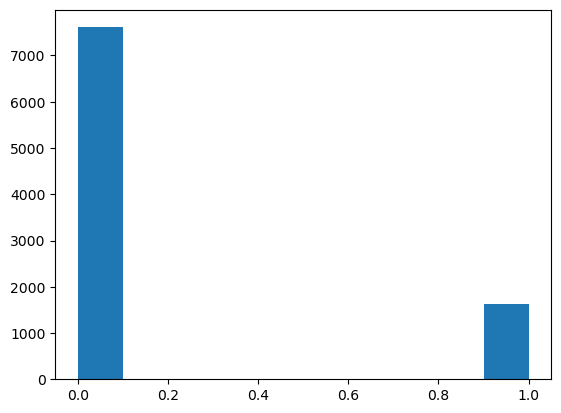

In [167]:
import matplotlib.pyplot as plt
plt.hist(final_preds)

In [169]:
UTMX = center_coords[:,0]
UTMY = center_coords[:,1]

In [171]:
df_pred_gcnn = pd.DataFrame(np.column_stack([UTMX, UTMY ,final_preds]), columns=['X','Y','y_pred'])

In [211]:
import geopandas as gpd
df_pred_gpd_gcnn = gpd.GeoDataFrame(df_pred_gcnn, geometry=gpd.points_from_xy(df_pred_gcnn.X, df_pred_gcnn.Y), crs="EPSG:32643")

In [179]:
df_pred_gpd_gcnn.to_csv("cuau_gcnn.csv")

In [181]:
df_pred_gpd_gcnn.to_file("cuau_gcnn.shp")

In [213]:
df_pred_gpd_gcnn[df_pred_gpd_gcnn['y_pred']==1].to_file("cuau_gcnn_pred_1.shp")

/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(


In [209]:
df_pred_gcnn = pd.read_csv("cuau_gcnn.csv")

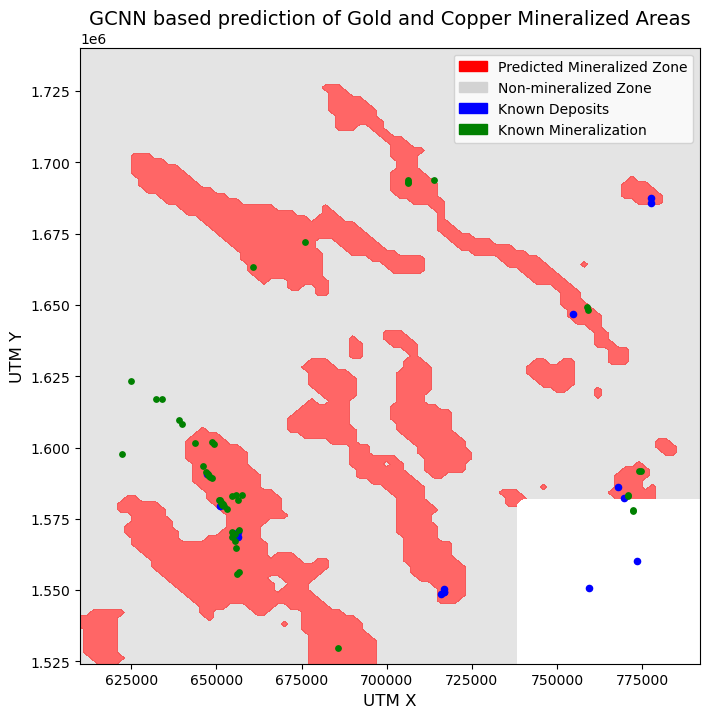

In [407]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coords = df_pred_gpd_gcnn['X'].values
Y_coords = df_pred_gpd_gcnn['Y'].values
Z = df_pred_gpd_gcnn['y_pred'].values
deposit_x = df_deposit_cu_au['X'].values
deposit_y = df_deposit_cu_au['Y'].values
mineral_x = df_min['X'].values
mineral_y = df_min['Y'].values


xi = np.unique(X_coords)
yi = np.unique(Y_coords)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X)):
    x_idx = np.where(xi == X_coords[i])[0][0]
    y_idx = np.where(yi == Y_coords[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  # Z[i] is prediction probability or binary label
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
mineral_x = np.array(mineral_x)
mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
mineral_x_clipped = mineral_x[mineral_mask]
mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(8, 8))



contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("GCNN based prediction of Gold and Copper Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits')
black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot, black_dot], loc='upper right')


plt.savefig("cuau_gcnn.jpg")
plt.show()


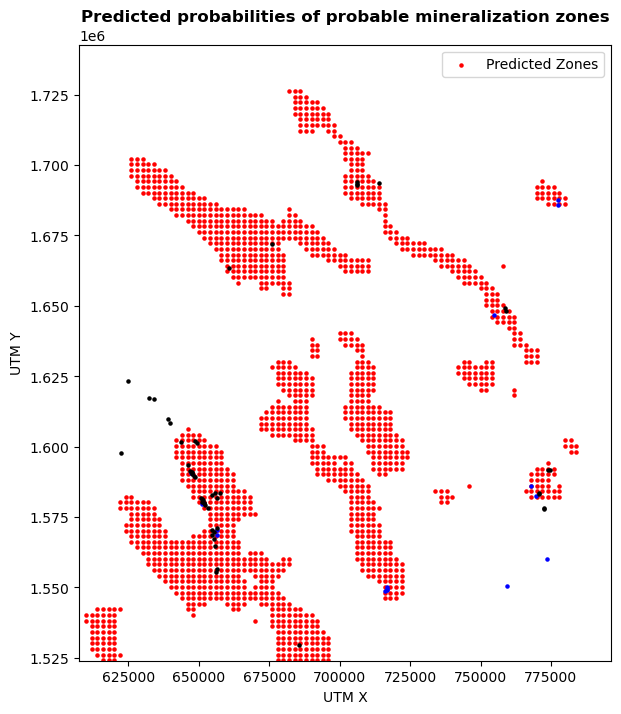

In [177]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
df_pred_gpd_gcnn[df_pred_gpd_gcnn['y_pred'] == 1].plot(ax=ax, color='red', label="Predicted Zones", markersize=5)
df_deposit_cu_au.plot(ax=ax, color='blue', markersize=5)
df_min.plot(ax=ax, color='black', markersize=5)
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')
ax.set_xlim(607500, 796350)
ax.set_ylim(1524000, 1742700)
plt.legend()
plt.show()

In [395]:
df_pred_gpd_gcnn['label']=0
for buffer in df_deposit_cu_au_buffer:
    df_pred_gpd_gcnn.loc[df_pred_gpd_gcnn.geometry.within(buffer), 'label'] = 1

In [397]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = df_pred_gpd_gcnn['label']
y_pred_binary = (df_pred_gpd_gcnn['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.8235803136830719
Precision: 0.0024464831804281344
Recall: 1.0
F1 Score: 0.004881025015253203
Confusion Matrix:
 [[7610 1631]
 [   0    4]]


In [399]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_binary, output_dict=True)


In [401]:
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
              precision    recall  f1-score     support
0              1.000000  0.823504  0.903210  9241.00000
1              0.002446  1.000000  0.004881     4.00000
accuracy       0.823580  0.823580  0.823580     0.82358
macro avg      0.501223  0.911752  0.454046  9245.00000
weighted avg   0.999568  0.823580  0.902822  9245.00000


In [403]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

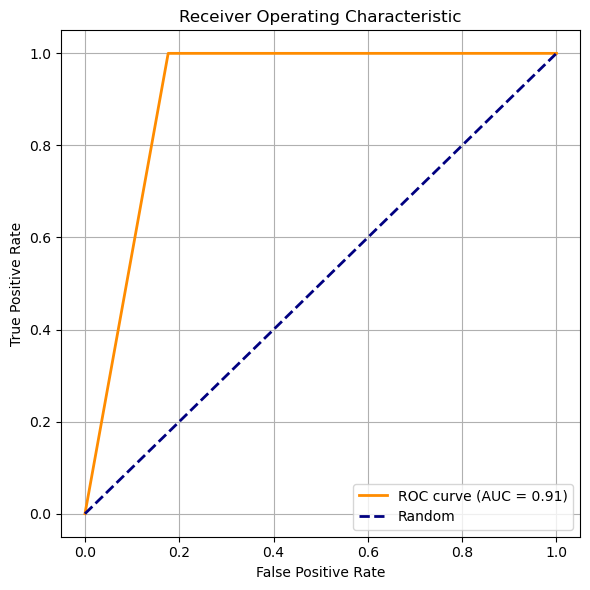

In [405]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_gcnn.jpg")
plt.show()


In [ ]:
#### Random Forest and XGBoost classifier #######

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
rc = RandomForestClassifier(n_estimators=100, random_state=42)

In [79]:
X_rf = X_mod.mean(axis=(1, 2))  


In [81]:
X_rf.shape

(11211, 16)

In [83]:
Y.shape

(11211,)

In [85]:
rc.fit(X_rf,Y)

RandomForestClassifier(random_state=42)

In [87]:
X_test_rf = X_test_mod.mean(axis=(1, 2)) 

In [89]:
X_test_rf.shape

(9245, 16)

In [91]:
y_pred = rc.predict(X_test_rf)

In [93]:
y_pred.shape

(9245,)

In [95]:
UTMX = center_coords[:,0]
UTMY = center_coords[:,1]

In [97]:
df_pred_rf = pd.DataFrame(np.column_stack([UTMX, UTMY , y_pred]), columns=['X','Y','y_pred'])

In [99]:
df_pred_rf_gpd = gpd.GeoDataFrame(df_pred_rf, geometry=gpd.points_from_xy(df_pred_rf.X, df_pred_rf.Y), crs="EPSG:32643")

In [141]:
df_pred_rf_gpd.to_file("cuau_rf_pred.shp")

In [215]:
df_pred_rf_gpd[df_pred_rf_gpd['y_pred']==1].to_file("cuau_rf_pred_1.shp")

In [143]:
df_pred_rf_gpd.to_csv("cuau_rf_pred.csv")

<Axes: >

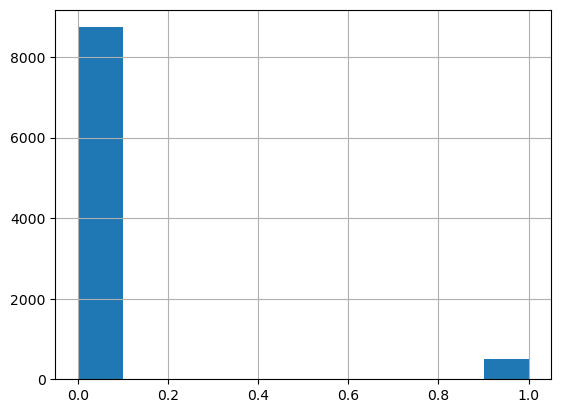

In [101]:
df_pred_rf_gpd['y_pred'].hist()

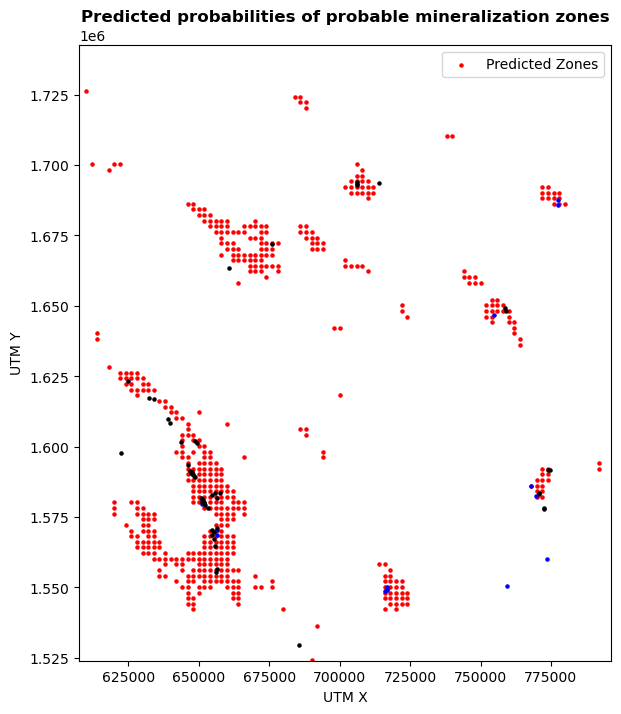

In [103]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
df_pred_rf_gpd[df_pred_rf_gpd['y_pred'] == 1].plot(ax=ax, color='red', label="Predicted Zones", markersize=5)
df_deposit_cu_au.plot(ax=ax, color='blue', markersize=5)
df_min.plot(ax=ax, color='black', markersize=5)
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')
ax.set_xlim(607500, 796350)
ax.set_ylim(1524000, 1742700)
plt.legend()
plt.show()

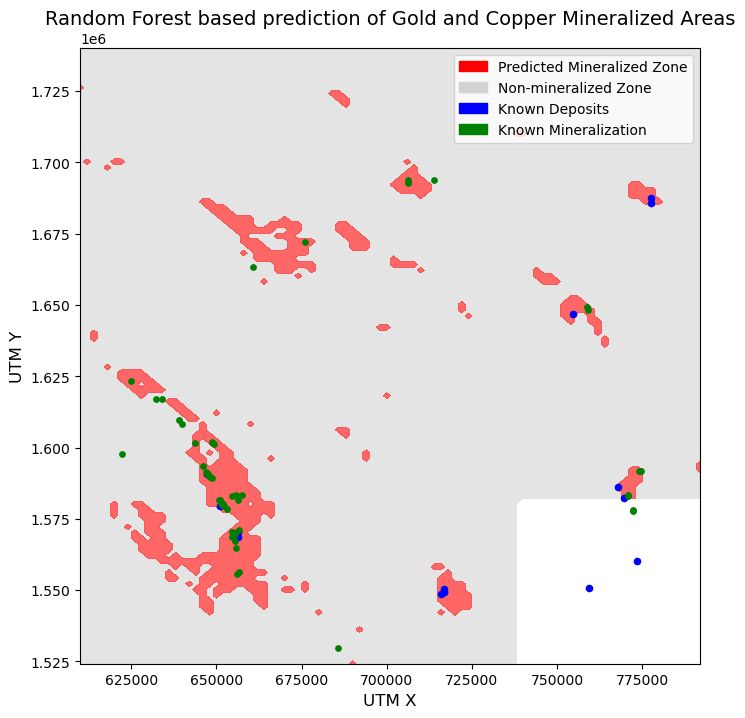

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coords = df_pred_rf_gpd['X'].values
Y_coords = df_pred_rf_gpd['Y'].values
Z = df_pred_rf_gpd['y_pred'].values
deposit_x = df_deposit_cu_au['X'].values
deposit_y = df_deposit_cu_au['Y'].values
mineral_x = df_min['X'].values
mineral_y = df_min['Y'].values

xi = np.unique(X_coords)
yi = np.unique(Y_coords)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X_coords)):
    x_idx = np.where(xi == X_coords[i])[0][0]
    y_idx = np.where(yi == Y_coords[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
mineral_x = np.array(mineral_x)
mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
mineral_x_clipped = mineral_x[mineral_mask]
mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(8, 8))



contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("Random Forest based prediction of Gold and Copper Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits')
black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot, black_dot], loc='upper right')


plt.savefig("cuau_rf.jpg")
plt.show()


In [175]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.4 MB/s eta 0:00:00


In [107]:
from xgboost import XGBClassifier

In [109]:
xgb = XGBClassifier()

In [111]:
xgb.fit(X_rf,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [113]:
y_pred_xgb = xgb.predict(X_test_rf)

(array([8847.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         398.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

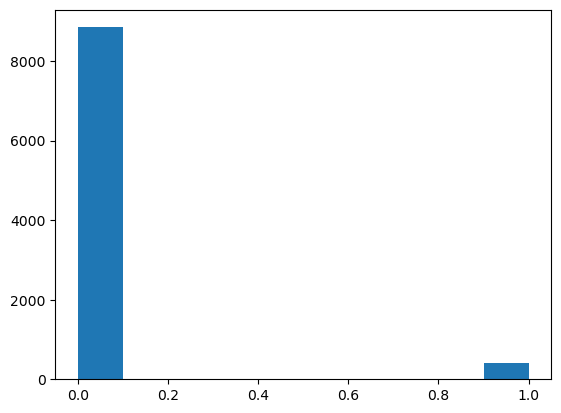

In [115]:
plt.hist(y_pred_xgb)

In [117]:
df_pred_xgb = pd.DataFrame(np.column_stack([UTMX, UTMY , y_pred_xgb]), columns=['X','Y','y_pred'])

In [119]:
df_pred_xgb_gpd = gpd.GeoDataFrame(df_pred_xgb, geometry=gpd.points_from_xy(df_pred_xgb.X, df_pred_xgb.Y), crs="EPSG:32643")

In [145]:
df_pred_xgb_gpd.to_file("cuau_xgb_pred.shp")

In [217]:
df_pred_xgb_gpd[df_pred_xgb_gpd['y_pred']==1].to_file("cuau_xgb_pred_1.shp")

In [147]:
df_pred_xgb_gpd.to_csv("cuau_xgb_pred.csv")

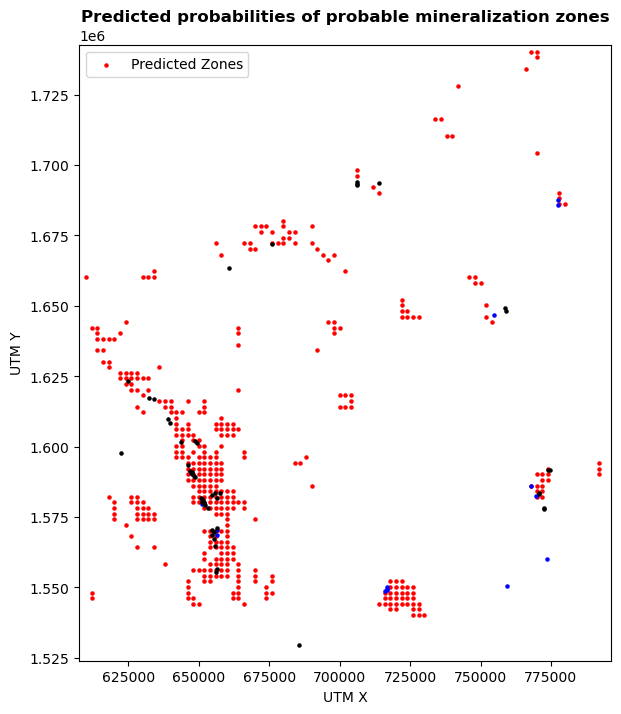

In [121]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
#df_mod_gdf.plot(column='Band_13', ax=ax, cmap ='viridis')
df_pred_xgb_gpd[df_pred_xgb_gpd['y_pred'] == 1].plot(ax=ax, color='red', label="Predicted Zones", markersize=5)
df_deposit_cu_au.plot(ax=ax, color='blue', markersize=5)
df_min.plot(ax=ax, color='black', markersize=5)
plt.xlabel("UTM X")
plt.ylabel("UTM Y")
plt.title("Predicted probabilities of probable mineralization zones", weight='bold')
ax.set_xlim(607500, 796350)
ax.set_ylim(1524000, 1742700)
plt.legend()
plt.show()

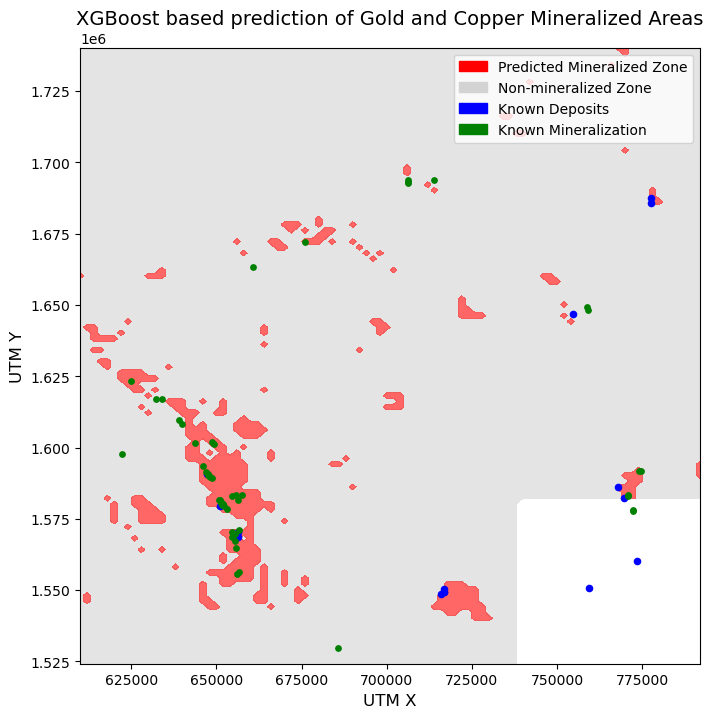

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib.patches as mpatches



X_coords = df_pred_xgb_gpd['X'].values
Y_coords = df_pred_xgb_gpd['Y'].values
Z = df_pred_xgb_gpd['y_pred'].values
deposit_x = df_deposit_cu_au['X'].values
deposit_y = df_deposit_cu_au['Y'].values
mineral_x = df_min['X'].values
mineral_y = df_min['Y'].values
# Convert to 2D grid if possible

xi = np.unique(X_coords)
yi = np.unique(Y_coords)
zi = np.full((len(yi), len(xi)), np.nan)

for i in range(len(X_coords)):
    x_idx = np.where(xi == X_coords[i])[0][0]
    y_idx = np.where(yi == Y_coords[i])[0][0]
    zi[y_idx, x_idx] = Z[i]  # Z[i] is prediction probability or binary label
    
x_min, x_max = xi.min(), xi.max()
y_min, y_max = yi.min(), yi.max()

deposit_x = np.array(deposit_x)
deposit_y = np.array(deposit_y)
mineral_x = np.array(mineral_x)
mineral_y = np.array(mineral_y)

deposit_mask = (deposit_x >= x_min) & (deposit_x <= x_max) & (deposit_y >= y_min) & (deposit_y <= y_max)
mineral_mask = (mineral_x >= x_min) & (mineral_x <= x_max) & (mineral_y >= y_min) & (mineral_y <= y_max)

deposit_x_clipped = deposit_x[deposit_mask]
deposit_y_clipped = deposit_y[deposit_mask]
mineral_x_clipped = mineral_x[mineral_mask]
mineral_y_clipped = mineral_y[mineral_mask]

plt.figure(figsize=(8, 8))



contour = plt.contourf(xi, yi, zi, levels=[0, 0.5, 1], colors=['lightgrey', 'red'], alpha=0.6)
plt.scatter(deposit_x_clipped, deposit_y_clipped, color='blue', label='Known Deposits', s=20)
plt.scatter(mineral_x_clipped, mineral_y_clipped, color='green', label='Known Mineralization', s=15)


plt.xlabel("UTM X", fontsize=12)
plt.ylabel("UTM Y", fontsize=12)
plt.title("XGBoost based prediction of Gold and Copper Mineralized Areas", fontsize=14)


red_patch = mpatches.Patch(color='red', label='Predicted Mineralized Zone')
grey_patch = mpatches.Patch(color='lightgrey', label='Non-mineralized Zone')
blue_dot = mpatches.Patch(color='blue', label='Known Deposits')
black_dot = mpatches.Patch(color='green', label='Known Mineralization')
plt.legend(handles=[red_patch, grey_patch, blue_dot, black_dot], loc='upper right')


plt.savefig("cuau_xgb.jpg")
plt.show()


In [273]:
df_pred_rf_gpd['label']=0
for buffer in df_deposit_cu_au_buffer:
    df_pred_rf_gpd.loc[df_pred_rf_gpd.geometry.within(buffer), 'label'] = 1


In [275]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = df_pred_rf_gpd['label']
y_pred_binary = (df_pred_rf_gpd['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.9458085451595457
Precision: 0.007920792079207921
Recall: 1.0
F1 Score: 0.015717092337917484
Confusion Matrix:
 [[8740  501]
 [   0    4]]


In [277]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_binary, output_dict=True)

In [279]:
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.945785  0.972137  9241.000000
1              0.007921  1.000000  0.015717     4.000000
accuracy       0.945809  0.945809  0.945809     0.945809
macro avg      0.503960  0.972893  0.493927  9245.000000
weighted avg   0.999571  0.945809  0.971723  9245.000000


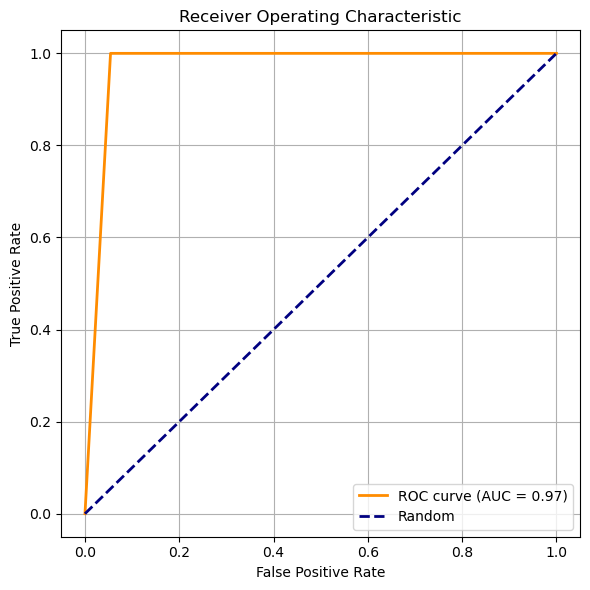

In [281]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_rf.jpg")
plt.show()

In [131]:
df_pred_xgb_gpd['label']=0
for buffer in df_deposit_cu_au_buffer:
    df_pred_xgb_gpd.loc[df_pred_xgb_gpd.geometry.within(buffer), 'label'] = 1


In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
y_true = df_pred_xgb_gpd['label']
y_pred_binary = (df_pred_xgb_gpd['y_pred'] > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_binary))
print("Precision:", precision_score(y_true, y_pred_binary))
print("Recall:", recall_score(y_true, y_pred_binary))
print("F1 Score:", f1_score(y_true, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_binary))

Accuracy: 0.957382368848026
Precision: 0.010050251256281407
Recall: 1.0
F1 Score: 0.01990049751243781
Confusion Matrix:
 [[8847  394]
 [   0    4]]


In [135]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_binary, output_dict=True)

In [137]:
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary)
roc_auc = auc(fpr, tpr)

Classification Report:
              precision    recall  f1-score      support
0              1.000000  0.957364  0.978218  9241.000000
1              0.010050  1.000000  0.019900     4.000000
accuracy       0.957382  0.957382  0.957382     0.957382
macro avg      0.505025  0.978682  0.499059  9245.000000
weighted avg   0.999572  0.957382  0.977803  9245.000000


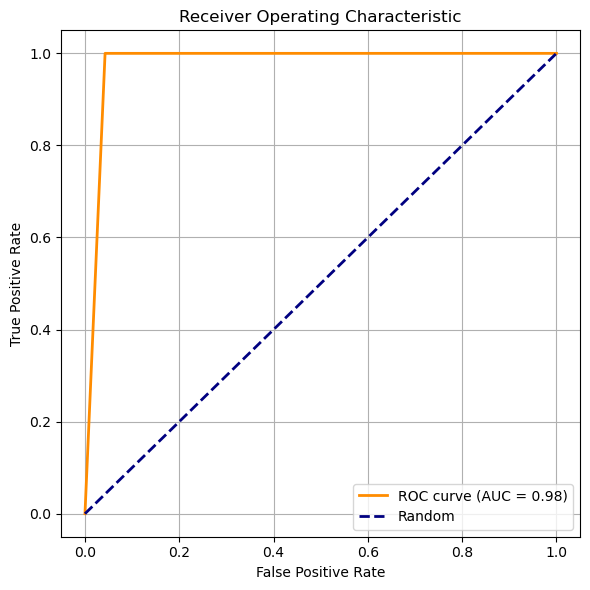

In [139]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_auc_xgb.jpg")
plt.show()

In [173]:
gdf1 = gpd.read_file("cuau_pred.shp")
gdf2 = gpd.read_file("cuau_ensemble_pred.shp")
gdf3 = gpd.read_file("cuau_gcnn.shp")
gdf4 = gpd.read_file("cuau_rf_pred.shp")
gdf5 = gpd.read_file("cuau_xgb_pred.shp")


In [175]:
target_crs = gdf1.crs
gdf2 = gdf2.to_crs(target_crs)
gdf3 = gdf3.to_crs(target_crs)
gdf4 = gdf4.to_crs(target_crs)
gdf5 = gdf5.to_crs(target_crs)


In [177]:
gdf1 = gdf1[gdf1['y_pred']==1][['geometry']]
gdf2 = gdf2[gdf2['y_pred']==1][['geometry']]
gdf3 = gdf3[gdf3['y_pred']==1][['geometry']]
gdf4 = gdf4[gdf4['y_pred']==1][['geometry']]
gdf5 = gdf5[gdf5['y_pred']==1][['geometry']]


In [179]:
common_area = gdf1.overlay(gdf2, how='intersection')
common_area = common_area.overlay(gdf3, how='intersection')
common_area = common_area.overlay(gdf4, how='intersection')
common_area = common_area.overlay(gdf5, how='intersection')



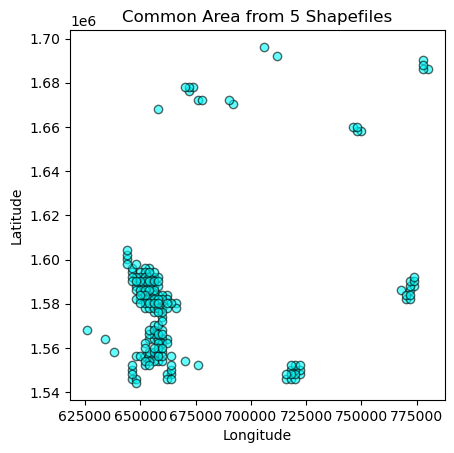

In [181]:
common_area.plot(edgecolor='black', facecolor='cyan', alpha=0.6)
plt.title("Common Area from 5 Shapefiles")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [185]:
common_area.to_file("cuau_common_area.shp")